In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import glob
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import numpy as np
from cycler import cycler
%matplotlib inline

from scipy import stats

In [2]:
t_titre = 17 #35
t_label = 12 #25
fig_width = 7 #15

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    print(a)

['pari', 'FM', '2017-09-26', '143606']
['pari', 'LB', '2017-09-19', '152205']
['enregistrement', 'LB', '2017-09-20', '151043']
['pari', 'DC', '2017-09-26', '162348']
['pari', 'IP', '2017-09-26', '122431']
['pari', 'BMC', '2017-09-25', '142503']
['enregistrement', 'IP', '2017-09-28', '115250']
['enregistrement', 'BMC', '2017-09-26', '095637']
['pari', 'CS', '2017-09-28', '154353']
['enregistrement', 'DC', '2017-09-27', '161040']


In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['BMC','CS','DC','FM','IP','LB'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

In [5]:
param = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['BMC','CS','DC','FM','IP','LB'] :
        a = 'parametre/%s_param_Fit.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            b['observer'] = liste[x][1]
            param.append(b)

In [6]:
print (param[0].keys())

dict_keys(['tau', 'maxi', 'v_anti', 'observer', 'start_anti', 'latence'])


### - les premier essais après le switch

In [7]:
# liste de tout
full_proba = [[],[],[],[],[]]
full_bino = [[],[],[],[],[]]
full_results = [[],[],[],[],[]]
full_va = [[],[],[],[],[]]
full_start_a = [[],[],[],[],[]]
full_latence = [[],[],[],[],[]]
full_tau = [[],[],[],[],[]]
full_max = [[],[],[],[],[]]

# listes de tout par sujet
proba_sujet = [[],[],[],[],[]]
bino_sujet = [[],[],[],[],[]]
results_sujet = [[],[],[],[],[]]
va_sujet = [[],[],[],[],[]]
start_a_sujet = [[],[],[],[],[]]
latence_sujet = [[],[],[],[],[]]
tau_sujet = [[],[],[],[],[]]
max_sujet = [[],[],[],[],[]]

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    v_anti = param[x]['v_anti']
    start_anti = param[x]['start_anti']
    latence = param[x]['latence']
    tau = param[x]['tau']
    maxi = param[x]['maxi']
    
    liste_proba = [[],[],[],[],[]]
    liste_bino = [[],[],[],[],[]]
    liste_results = [[],[],[],[],[]]
    liste_va = [[],[],[],[],[]]
    liste_start_a = [[],[],[],[],[]]
    liste_latence = [[],[],[],[],[]]
    liste_tau = [[],[],[],[],[]]
    liste_max = [[],[],[],[],[]]
    
    for block in range(N_blocks):
        
        for trial in range(N_trials):
            full_proba[0].append(p[trial, block, 1])
            full_bino[0].append(p[trial, block, 0])
            full_results[0].append(results[trial, block])
            full_va[0].append(v_anti[block][trial])
            full_start_a[0].append(start_anti[block][trial])
            full_latence[0].append(latence[block][trial])
            full_tau[0].append(tau[block][trial])
            full_max[0].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                
            liste_proba[0].append(p[trial, block, 1])
            liste_bino[0].append(p[trial, block, 0])
            liste_results[0].append(results[trial, block])
            liste_va[0].append(v_anti[block][trial])
            liste_start_a[0].append(start_anti[block][trial])
            liste_latence[0].append(latence[block][trial])
            liste_tau[0].append(tau[block][trial])
            liste_max[0].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                
        switch = [0]
        for s in range(N_trials):
            if p[s, block, 2]==1 :
                switch.append(s)
        switch.append(N_trials)

        
        for s1 in range(len(switch)-1) :

            for trial in np.arange(switch[s1]+5, switch[s1+1]) :
                full_proba[1].append(p[trial, block, 1])
                full_bino[1].append(p[trial, block, 0])
                full_results[1].append(results[trial, block])
                full_va[1].append(v_anti[block][trial])
                full_start_a[1].append(start_anti[block][trial])
                full_latence[1].append(latence[block][trial])
                full_tau[1].append(tau[block][trial])
                full_max[1].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                
                liste_proba[1].append(p[trial, block, 1])
                liste_bino[1].append(p[trial, block, 0])
                liste_results[1].append(results[trial, block])
                liste_va[1].append(v_anti[block][trial])
                liste_start_a[1].append(start_anti[block][trial])
                liste_latence[1].append(latence[block][trial])
                liste_tau[1].append(tau[block][trial])
                liste_max[1].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
            
            for trial in np.arange(switch[s1]+10, switch[s1+1]) :
                full_proba[2].append(p[trial, block, 1])
                full_bino[2].append(p[trial, block, 0])
                full_results[2].append(results[trial, block])
                full_va[2].append(v_anti[block][trial])
                full_start_a[2].append(start_anti[block][trial])
                full_latence[2].append(latence[block][trial])
                full_tau[2].append(tau[block][trial])
                full_max[2].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                
                liste_proba[2].append(p[trial, block, 1])
                liste_bino[2].append(p[trial, block, 0])
                liste_results[2].append(results[trial, block])
                liste_va[2].append(v_anti[block][trial])
                liste_start_a[2].append(start_anti[block][trial])
                liste_latence[2].append(latence[block][trial])
                liste_tau[2].append(tau[block][trial])
                liste_max[2].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
            
            for trial in np.arange(switch[s1]+15, switch[s1+1]) :
                full_proba[3].append(p[trial, block, 1])
                full_bino[3].append(p[trial, block, 0])
                full_results[3].append(results[trial, block])
                full_va[3].append(v_anti[block][trial])
                full_start_a[3].append(start_anti[block][trial])
                full_latence[3].append(latence[block][trial])
                full_tau[3].append(tau[block][trial])
                full_max[3].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                
                liste_proba[3].append(p[trial, block, 1])
                liste_bino[3].append(p[trial, block, 0])
                liste_results[3].append(results[trial, block])
                liste_va[3].append(v_anti[block][trial])
                liste_start_a[3].append(start_anti[block][trial])
                liste_latence[3].append(latence[block][trial])
                liste_tau[3].append(tau[block][trial])
                liste_max[3].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
            
            for trial in np.arange(switch[s1]+20, switch[s1+1]) :
                full_proba[4].append(p[trial, block, 1])
                full_bino[4].append(p[trial, block, 0])
                full_results[4].append(results[trial, block])
                full_va[4].append(v_anti[block][trial])
                full_start_a[4].append(start_anti[block][trial])
                full_latence[4].append(latence[block][trial])
                full_tau[4].append(tau[block][trial])
                full_max[4].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                
                liste_proba[4].append(p[trial, block, 1])
                liste_bino[4].append(p[trial, block, 0])
                liste_results[4].append(results[trial, block])
                liste_va[4].append(v_anti[block][trial])
                liste_start_a[4].append(start_anti[block][trial])
                liste_latence[4].append(latence[block][trial])
                liste_tau[4].append(tau[block][trial])
                liste_max[4].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
            
                
    for x in range(len(liste_proba)) :                      
        proba_sujet[x].append(liste_proba[x])
        bino_sujet[x].append(liste_bino[x])
        results_sujet[x].append(liste_results[x])
        va_sujet[x].append(liste_va[x])
        start_a_sujet[x].append(liste_start_a[x])
        latence_sujet[x].append(liste_latence[x])
        tau_sujet[x].append(liste_tau[x])
        max_sujet[x].append(liste_max[x])

## Probabilité réel

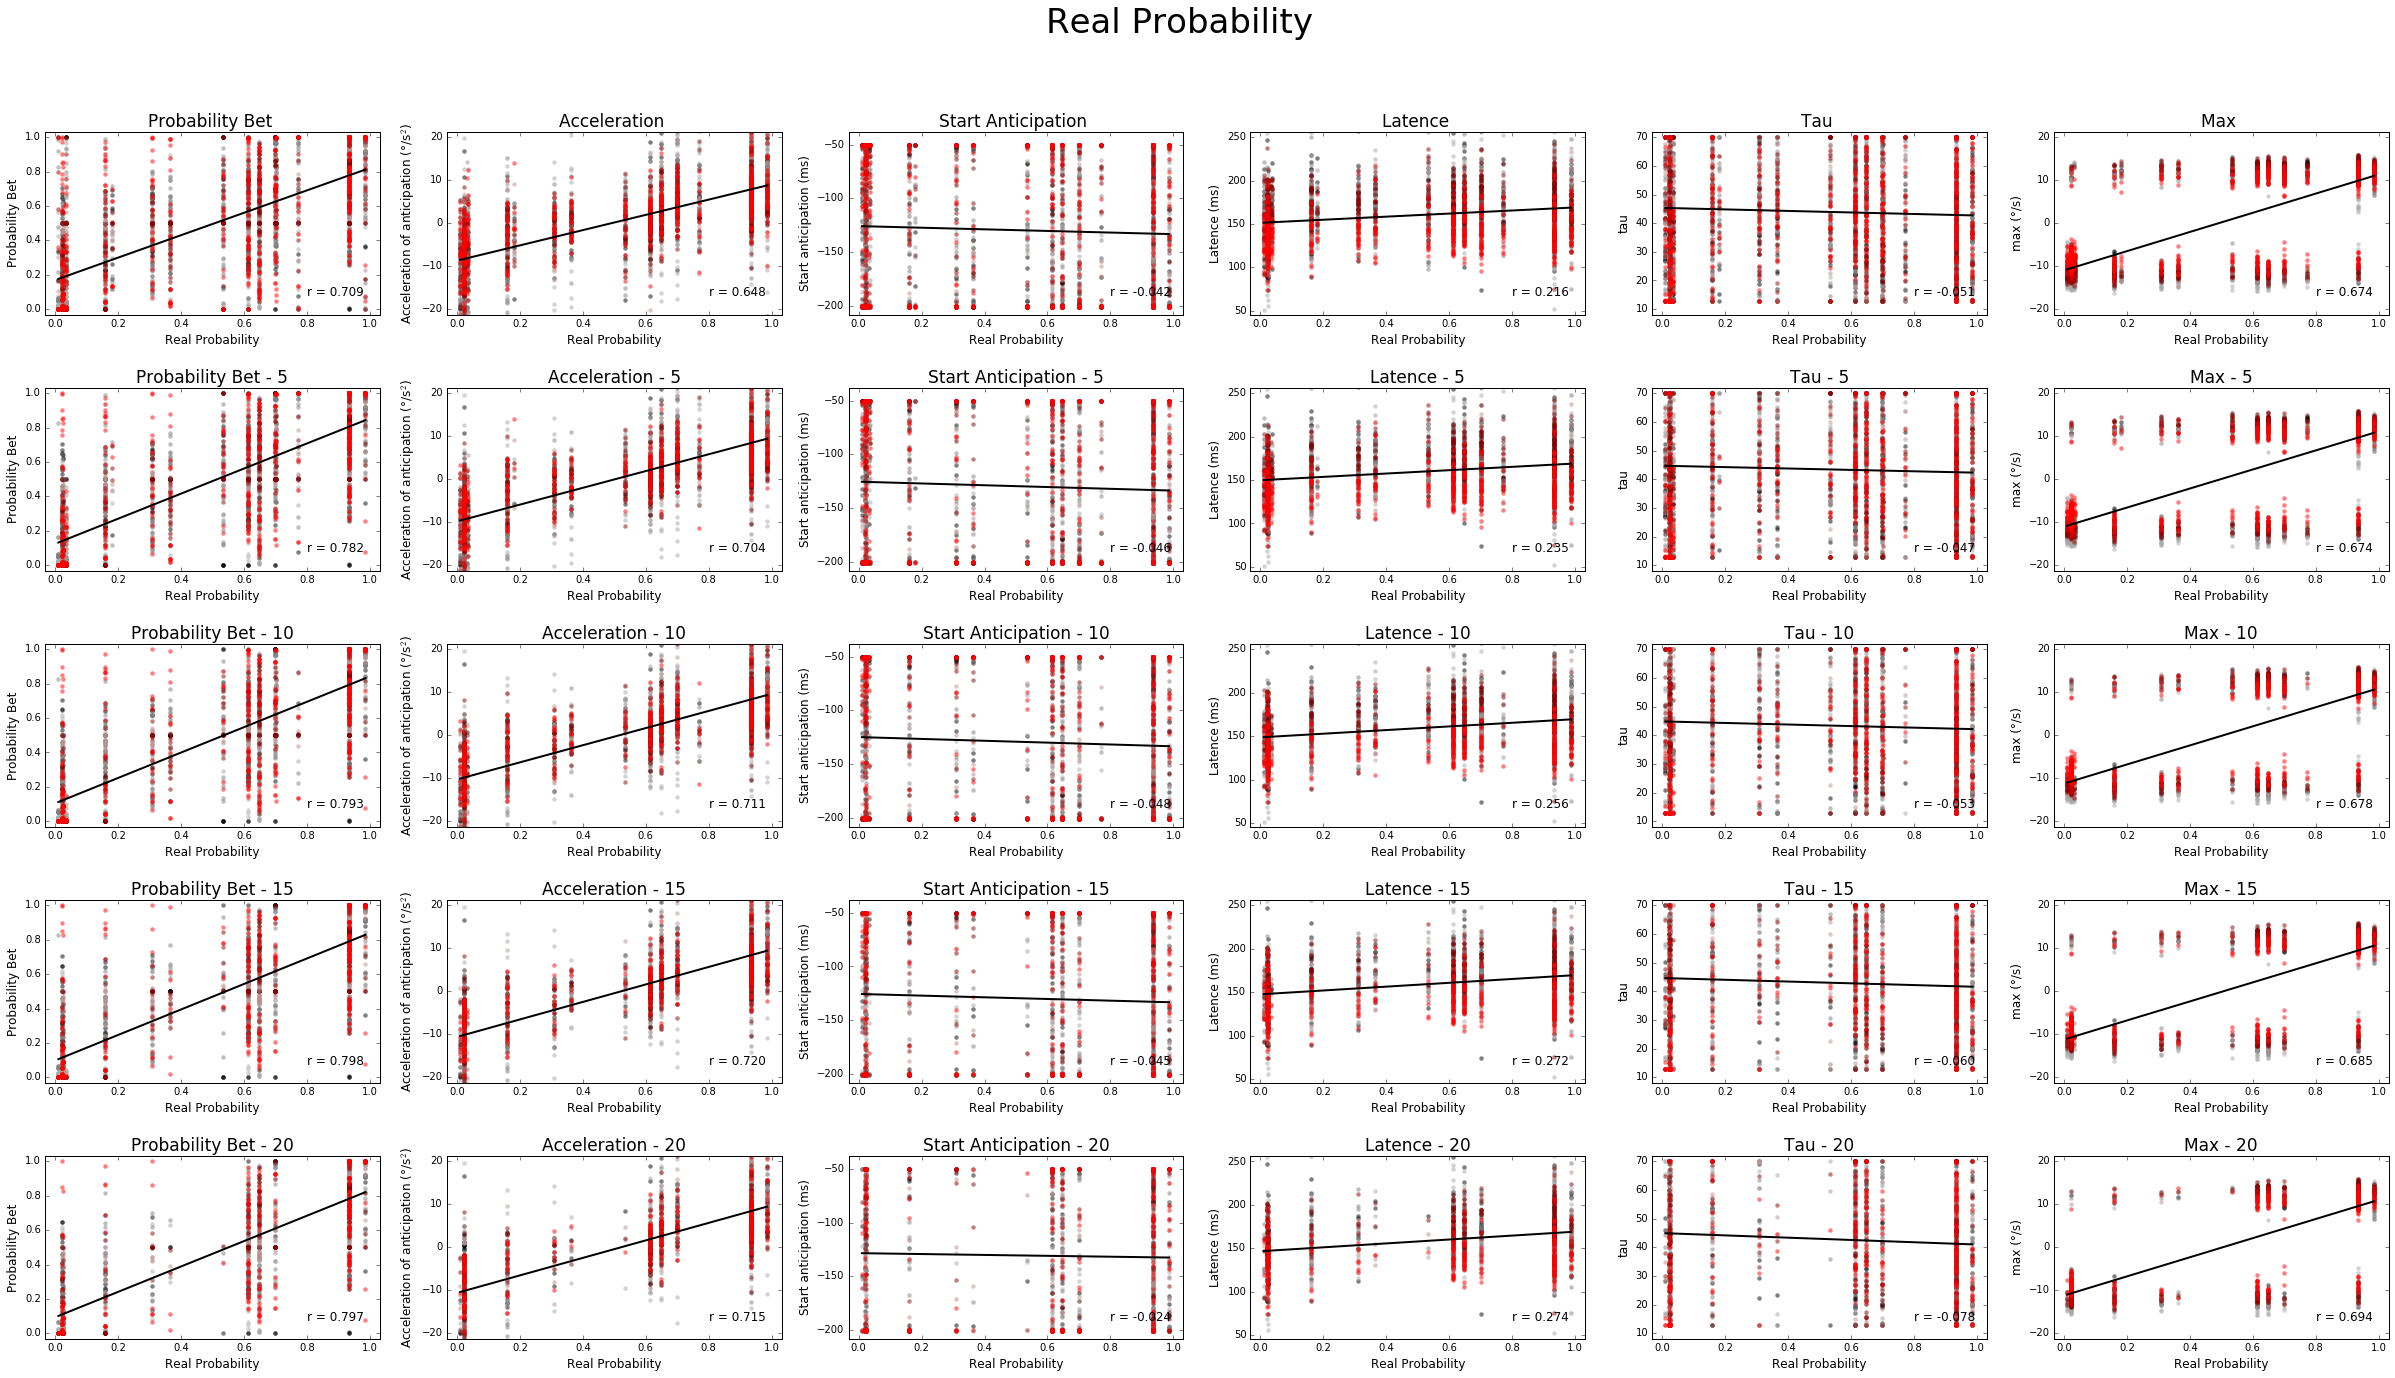

In [8]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability", fontsize=t_titre*2)

for z, comparaison in enumerate(['Probability Bet','Acceleration', 'Start Anticipation', 'Latence', 'Tau', 'Max']) :

    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :
        if z == 0 :
            axs[a][z].set_ylabel('Probability Bet', fontsize=t_label)
            sujet = results_sujet[a]
            full = full_results[a]
            y_1 = -0.032
            y_2 = 1.032
        elif z == 1 :
            axs[a][z].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
            sujet = va_sujet[a]
            full = full_va[a]
            y_1 = -21.28
            y_2 = 21.28
        
        elif z == 2 :
            axs[a][z].set_ylabel('Start anticipation (ms)', fontsize=t_label)
            sujet = start_a_sujet[a]
            full = full_start_a[a]
            y_1 = -208.08
            y_2 = -38.08
            
        elif z == 3 :
            axs[a][z].set_ylabel('Latence (ms)', fontsize=t_label)
            sujet = latence_sujet[a]
            full = full_latence[a]
            y_1 = 45.6
            y_2 = 256.4
            
        elif z == 4 :
            axs[a][z].set_ylabel('tau', fontsize=t_label)
            sujet = tau_sujet[a]
            full = full_tau[a]
            y_1 = 8.08
            y_2 = 71.92
            
        elif z == 5 :
            axs[a][z].set_ylabel('max (°/s)', fontsize=t_label)
            sujet = max_sujet[a]
            full = full_max[a]
            y_1 = -21.28
            y_2 = 21.28
        
        for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
            axs[a][z].scatter(proba_sujet[a][x], sujet[x], c=color, alpha=0.5, linewidths=0)
            
        slope, intercept, r_value, p_value, std_err = stats.linregress(full_proba[a], full)
        x_test = np.linspace(np.min(full_proba[a]), np.max(full_proba[a]), 100)
        fitLine = slope * x_test + intercept

        axs[a][z].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][z].text(0.8,y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        axs[a][z].axis([-0.032, 1.032, y_1, y_2])
 
        axs[a][z].set_title("%s %s"%(comparaison, nom), fontsize=t_titre)
        axs[a][z].set_xlabel('Real Probability', fontsize=t_label)

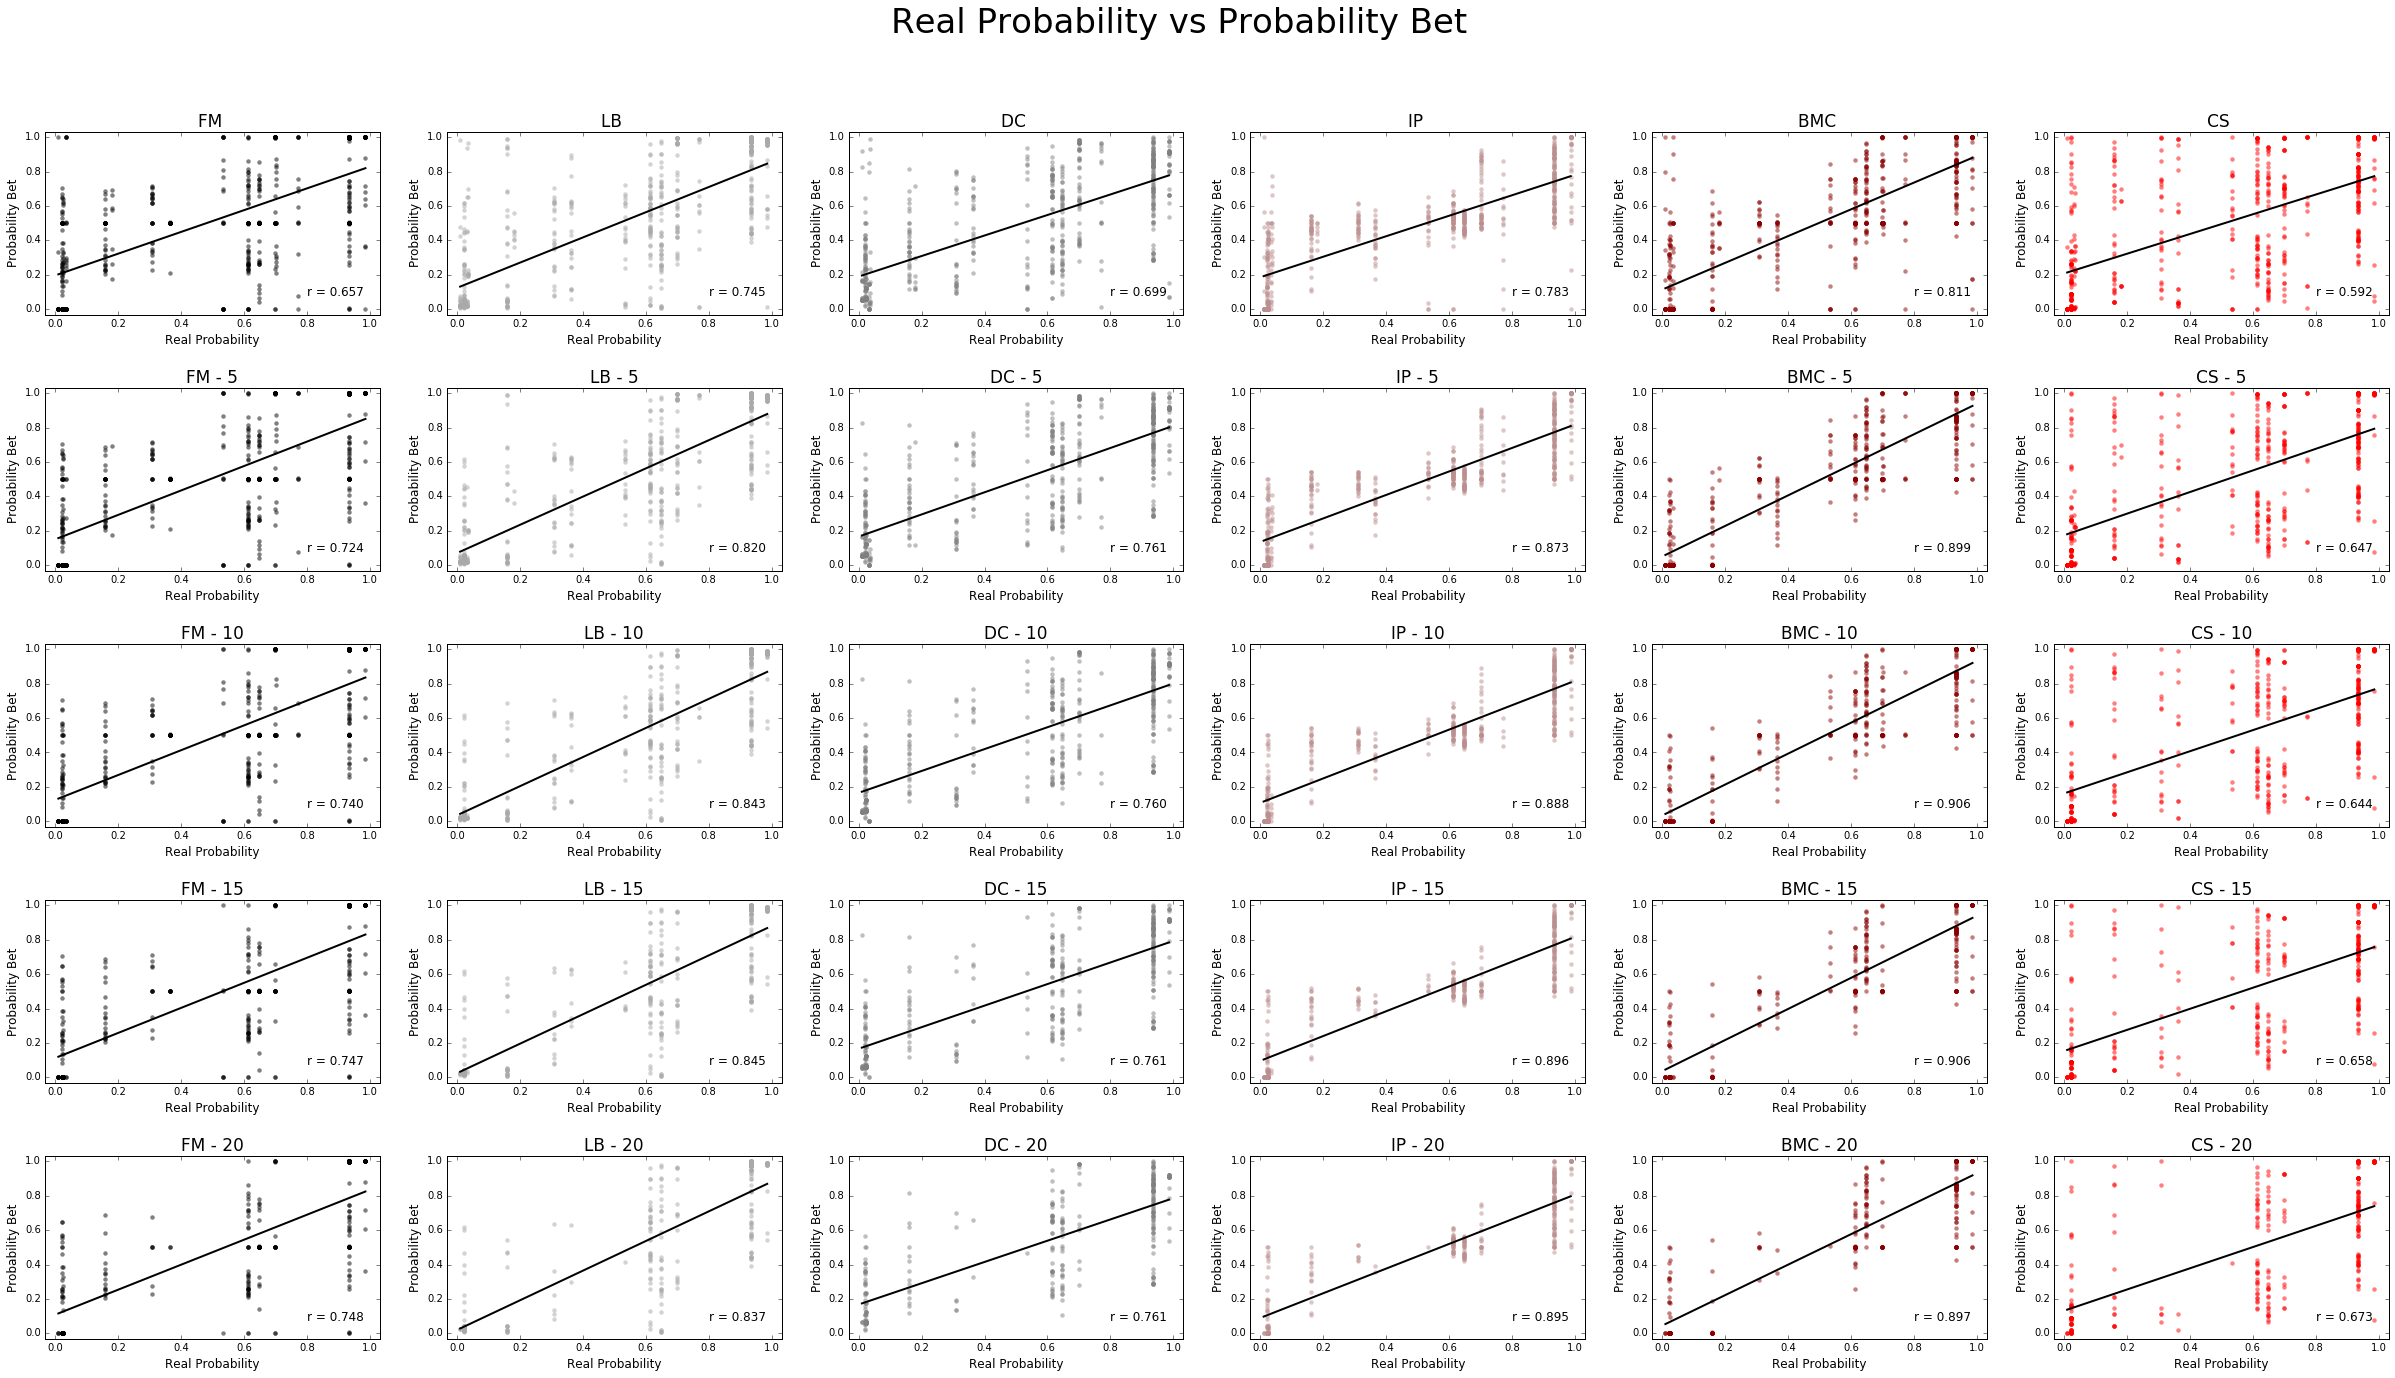

In [11]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability vs Probability Bet", fontsize=t_titre*2)
y_1 = -0.032
y_2 = 1.032

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        p = proba_sujet[a][x]
        results = results_sujet[a][x]
        axs[a][x].scatter(p, results, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(p, results)
        x_test = np.linspace(np.min(p), np.max(p), 100)
        fitLine = slope * x_test + intercept
        
        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Real Probability', fontsize=t_label)
        axs[a][x].set_ylabel('Probability Bet', fontsize=t_label)

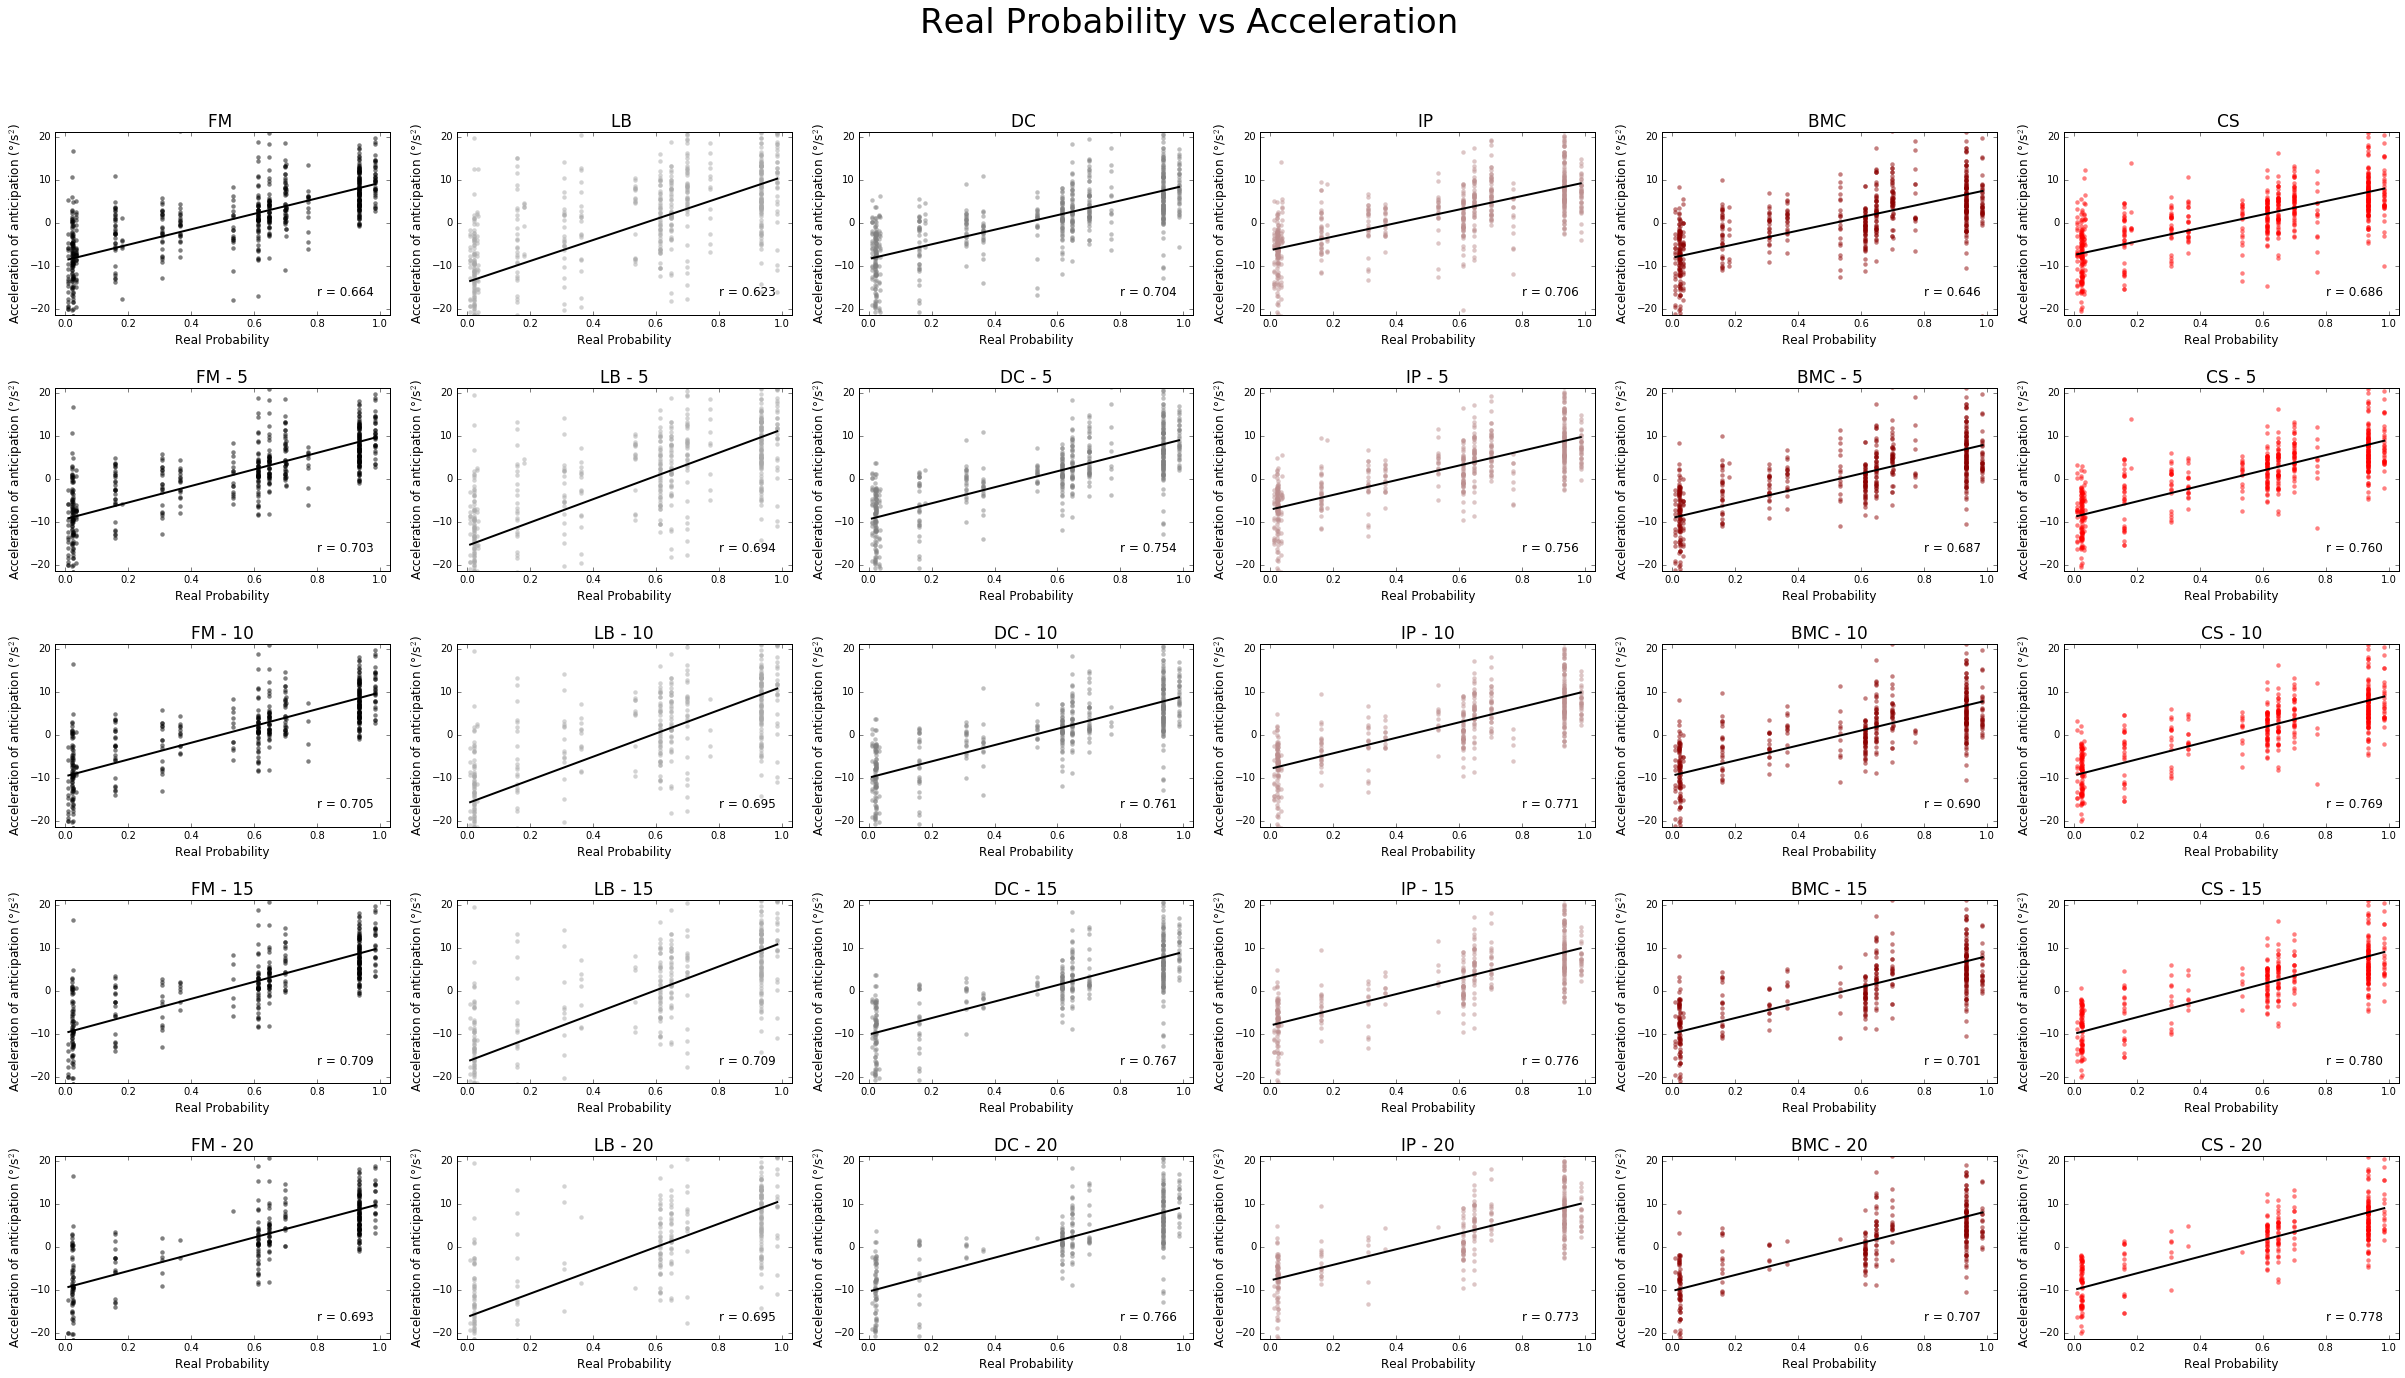

In [12]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability vs Acceleration", fontsize=t_titre*2)
y_1 = -21.28
y_2 = 21.28

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        p = proba_sujet[a][x]
        v_anti = va_sujet[a][x]
        axs[a][x].scatter(p, v_anti, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(p, v_anti)
        x_test = np.linspace(np.min(p), np.max(p), 100)
        fitLine = slope * x_test + intercept
        
        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Real Probability', fontsize=t_label)
        axs[a][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

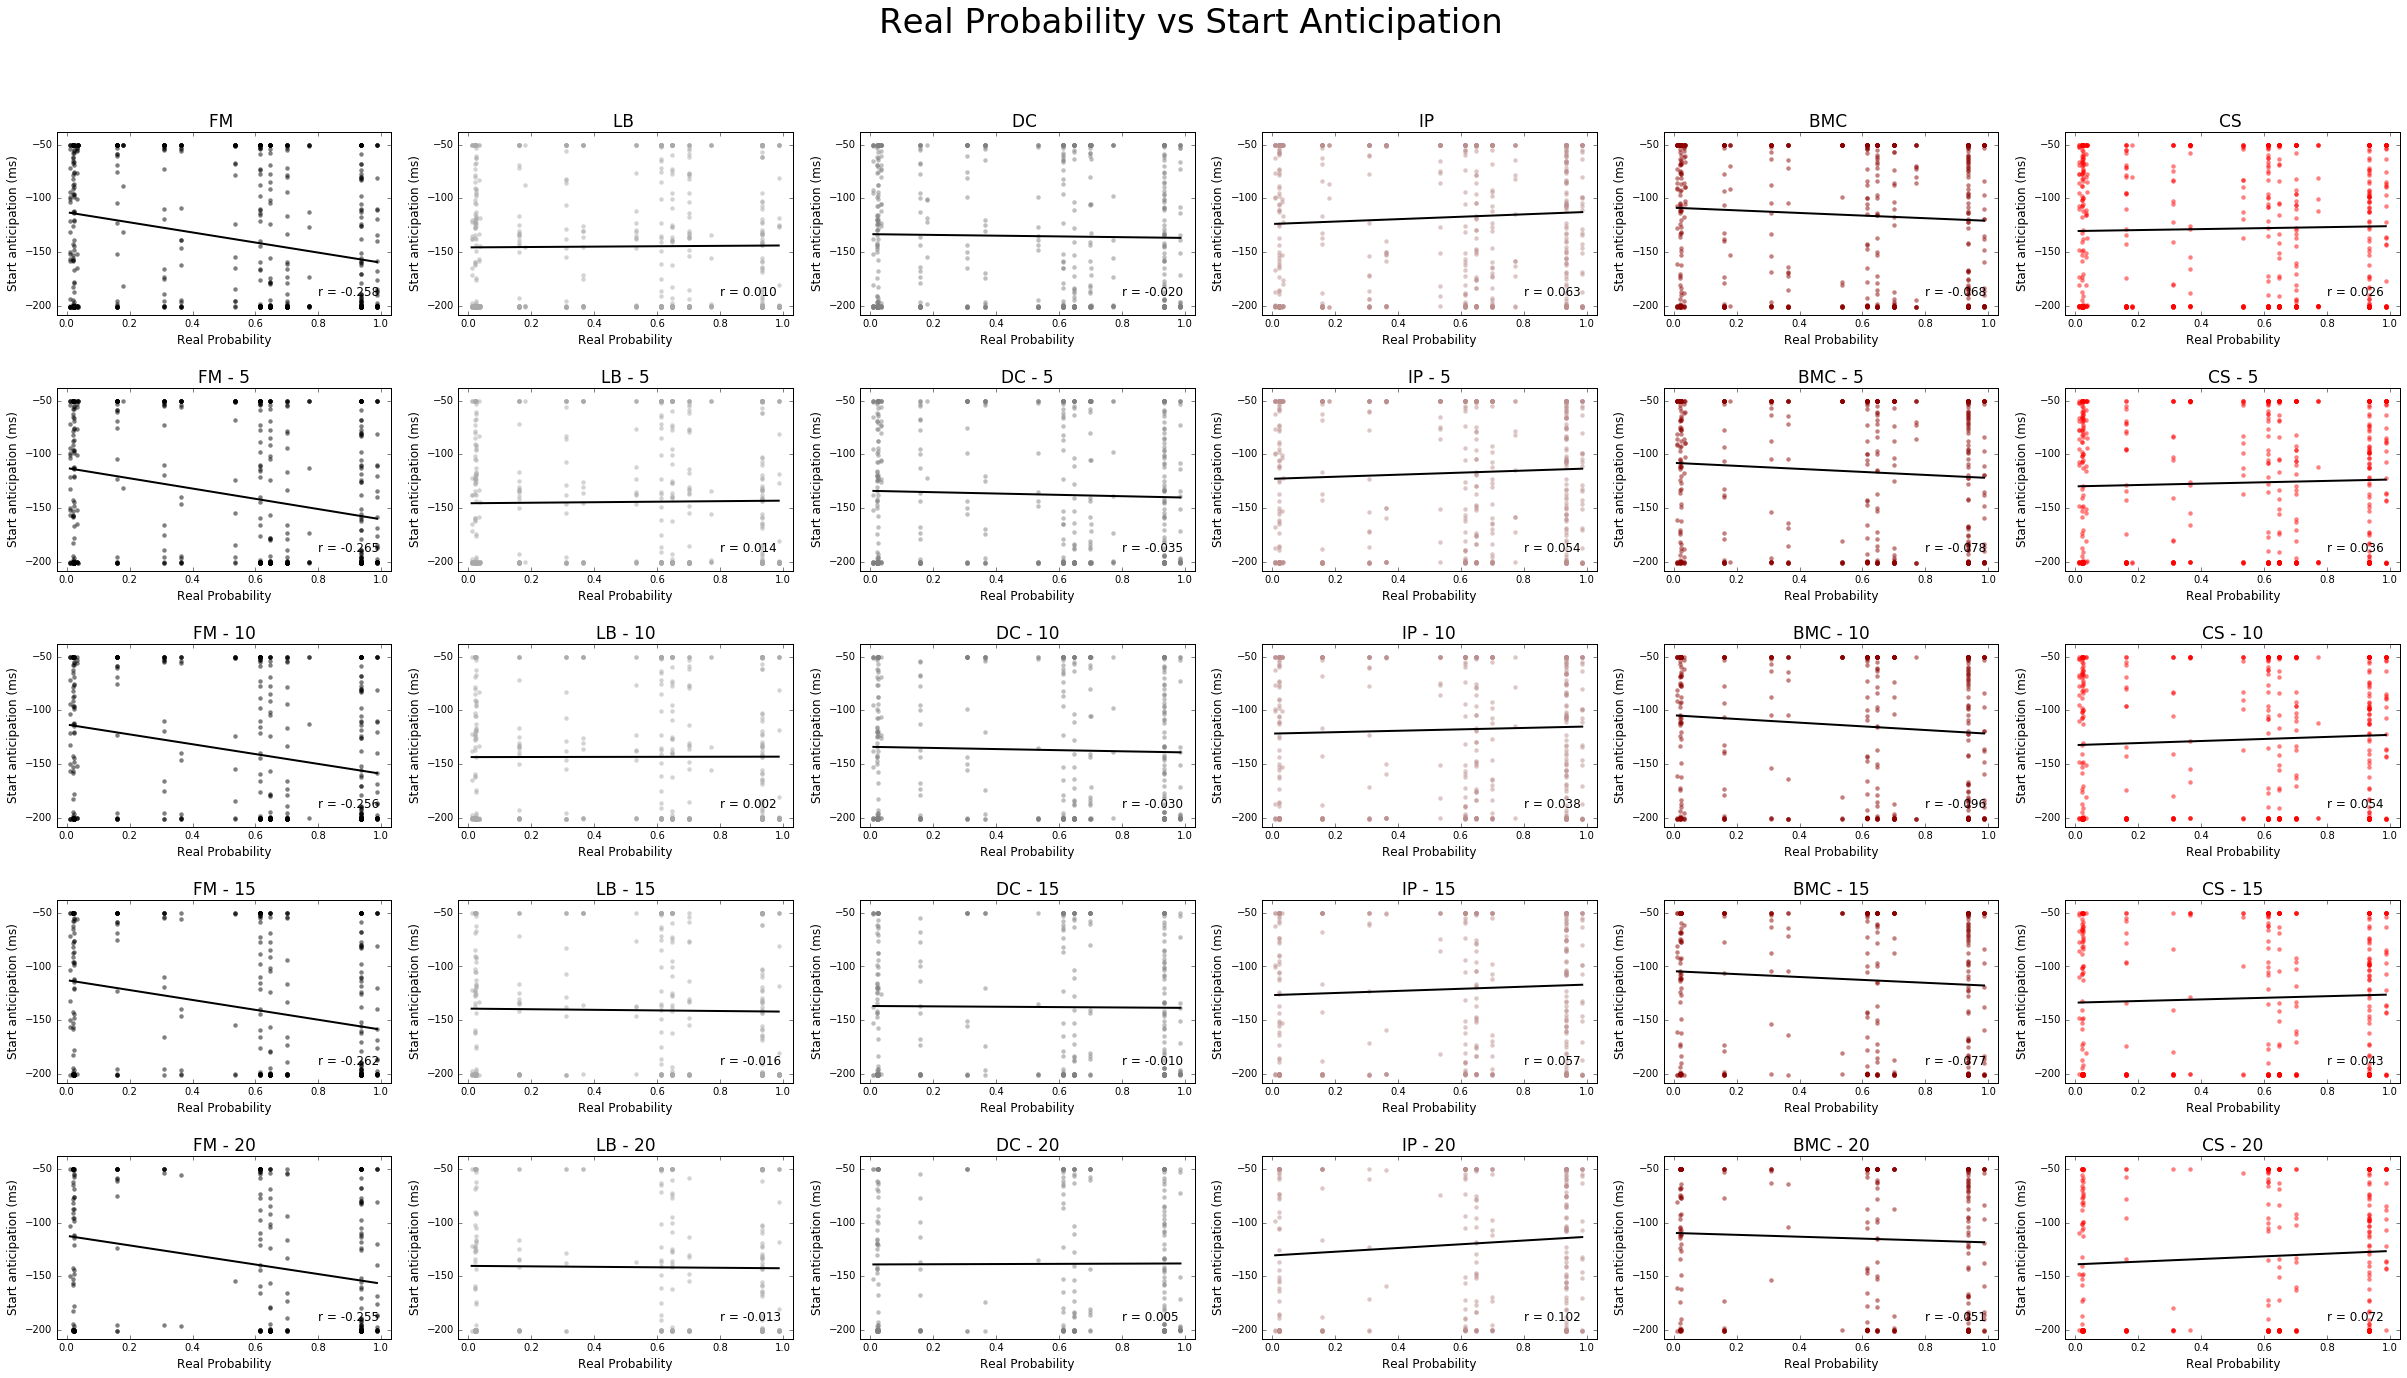

In [13]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability vs Start Anticipation", fontsize=t_titre*2)
y_1 = -208.08
y_2 = -38.08

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        p = proba_sujet[a][x]    
        start_a = start_a_sujet[a][x]
        axs[a][x].scatter(p, start_a, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(p, start_a)
        x_test = np.linspace(np.min(p), np.max(p), 100)
        fitLine = slope * x_test + intercept

        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Real Probability', fontsize=t_label)
        axs[a][x].set_ylabel('Start anticipation (ms)', fontsize=t_label)

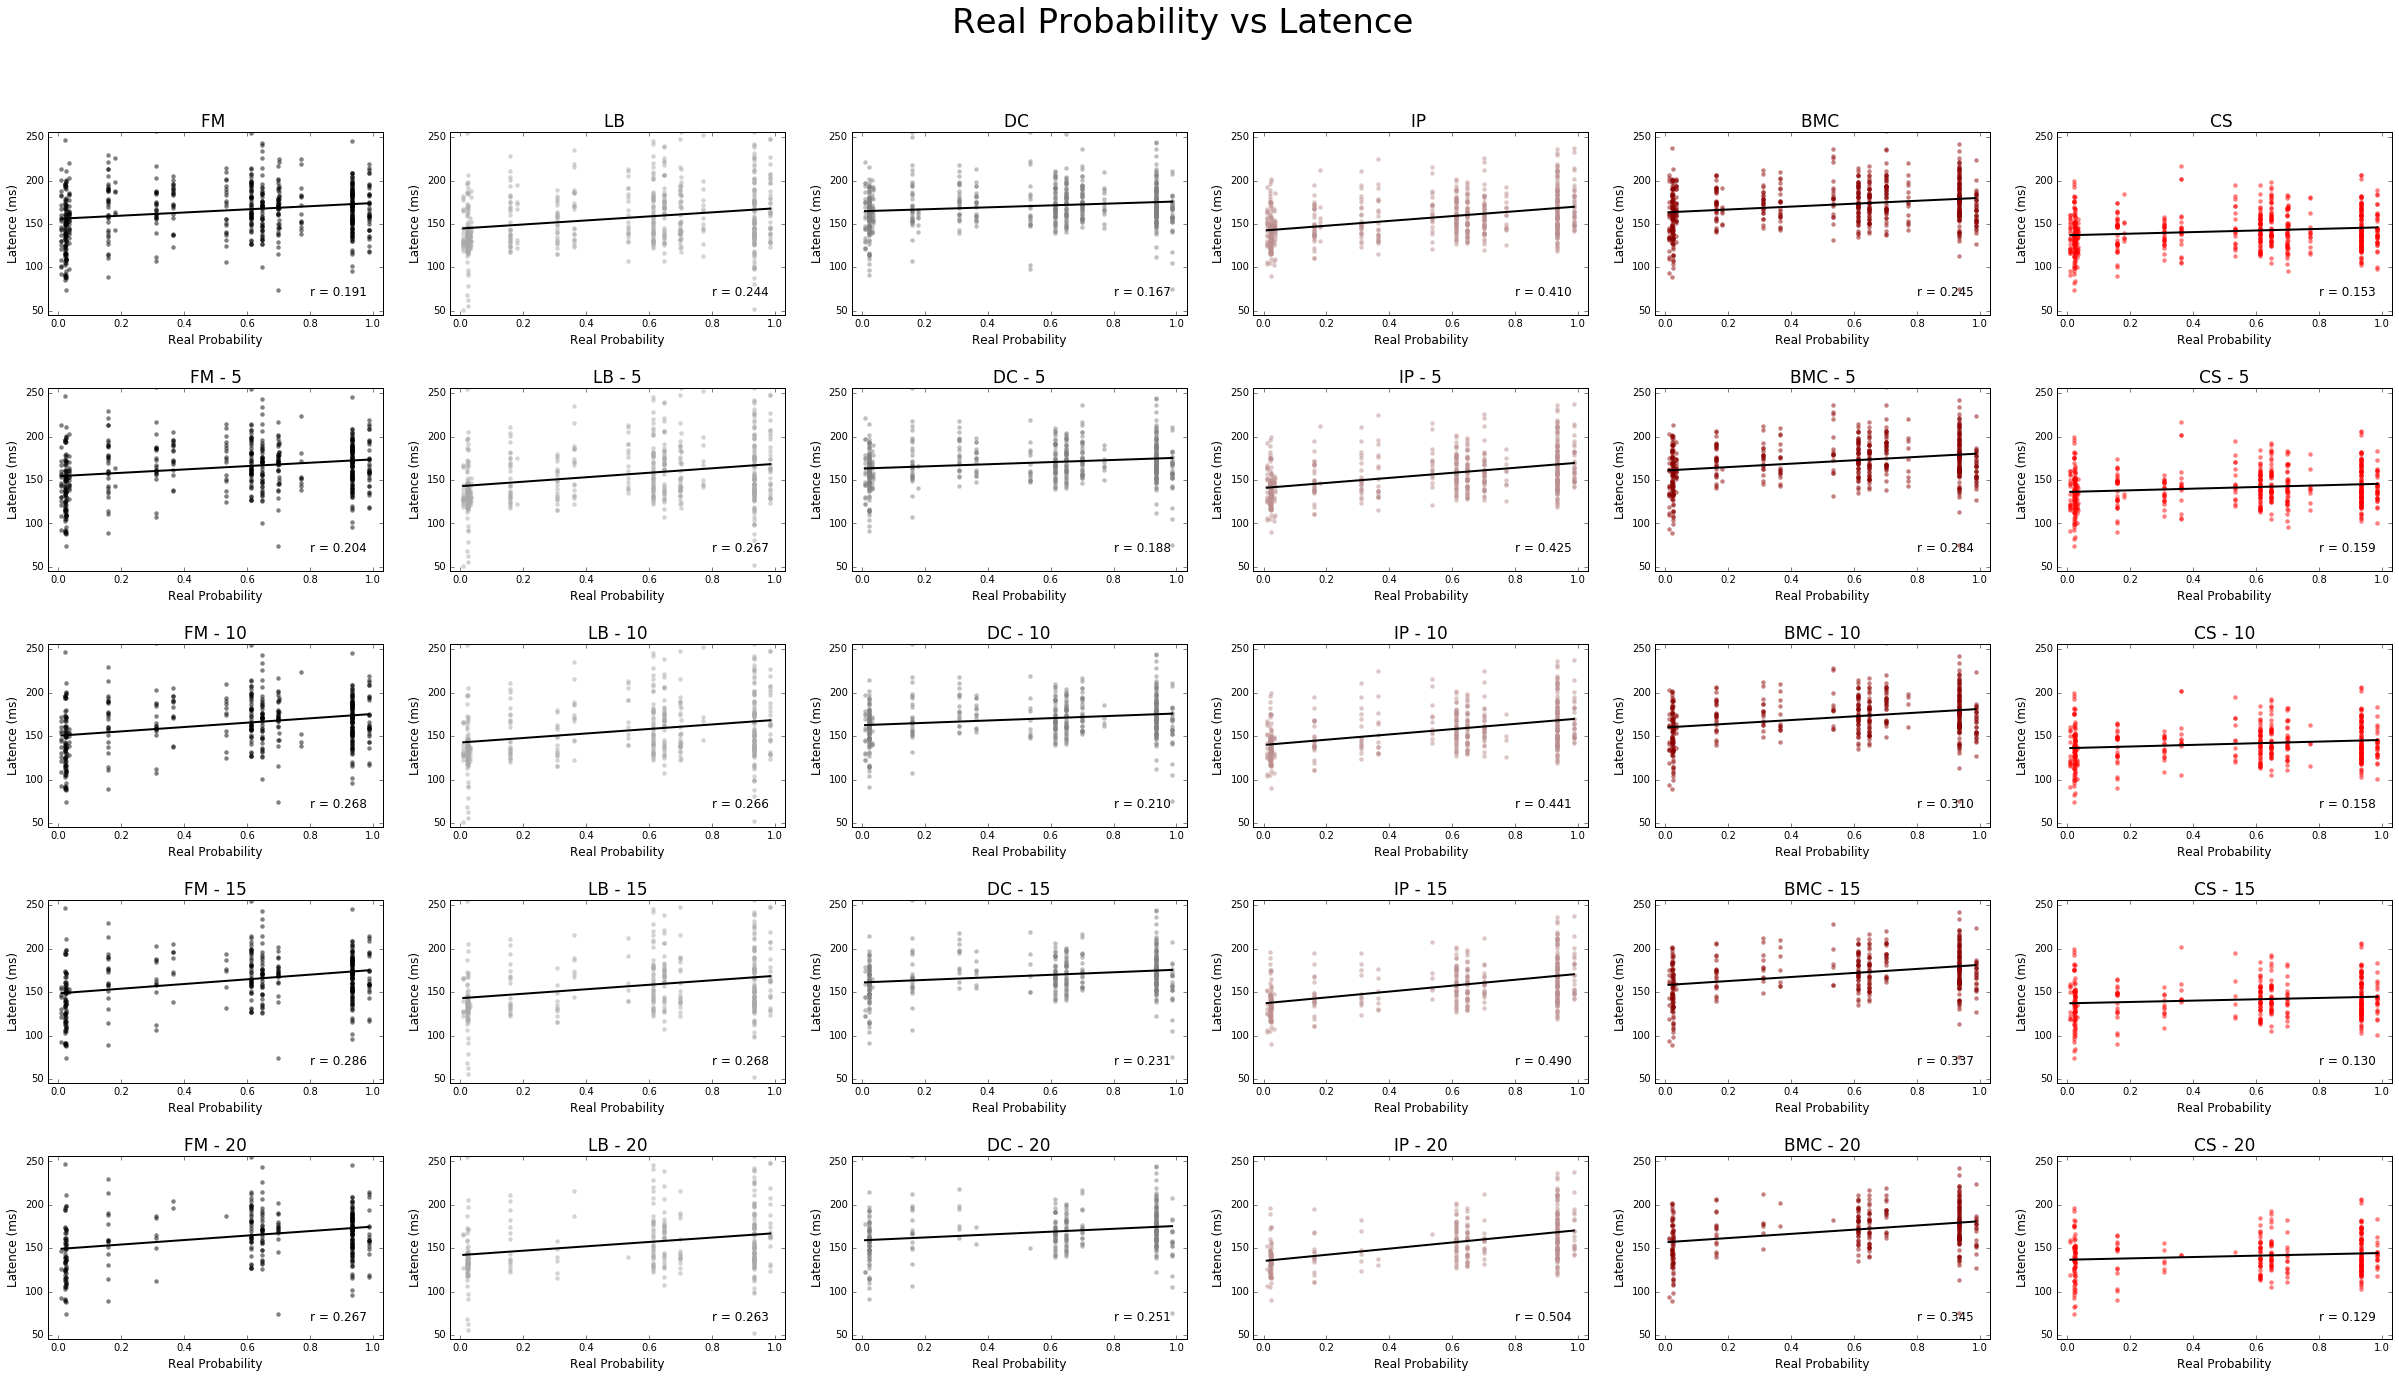

In [14]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability vs Latence", fontsize=t_titre*2)
y_1 = 45.6
y_2 = 256.4


for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        p = proba_sujet[a][x]    
        latence = latence_sujet[a][x]
        axs[a][x].scatter(p, latence, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(p, latence)
        x_test = np.linspace(np.min(p), np.max(p), 100)
        fitLine = slope * x_test + intercept

        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Real Probability', fontsize=t_label)
        axs[a][x].set_ylabel('Latence (ms)', fontsize=t_label)

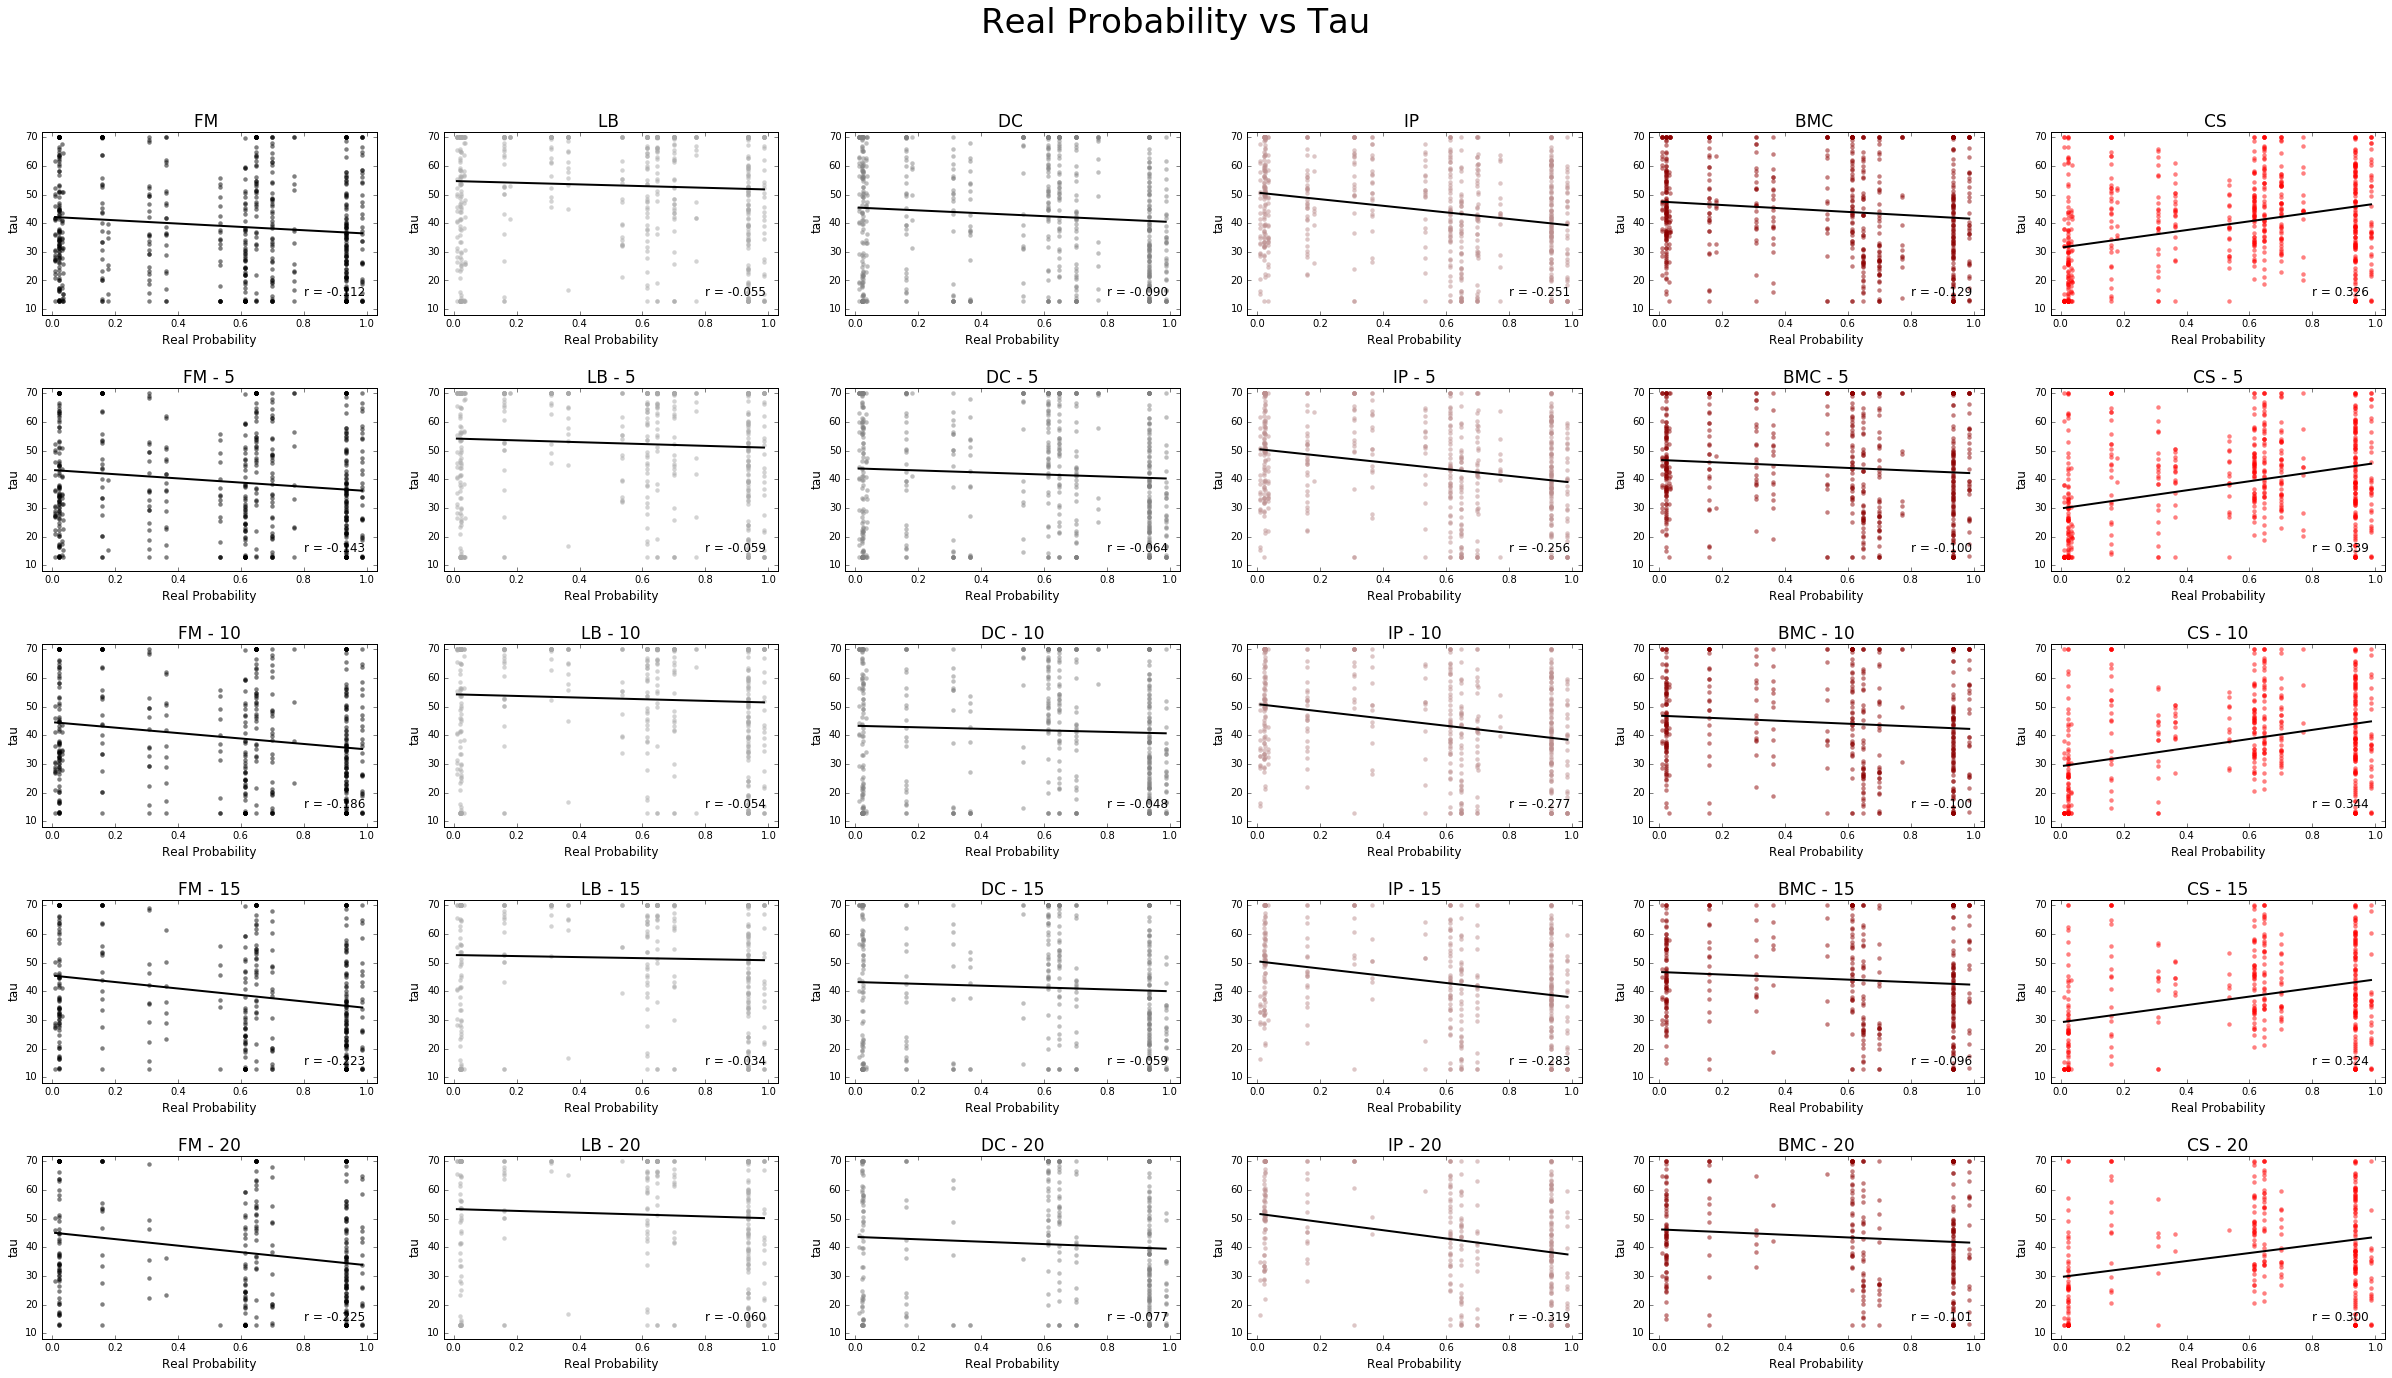

In [15]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability vs Tau", fontsize=t_titre*2)
y_1 = 8.08
y_2 = 71.92
            
for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        p = proba_sujet[a][x]    
        tau = tau_sujet[a][x]
        axs[a][x].scatter(p, tau, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(p, tau)
        x_test = np.linspace(np.min(p), np.max(p), 100)
        fitLine = slope * x_test + intercept

        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Real Probability', fontsize=t_label)
        axs[a][x].set_ylabel('tau', fontsize=t_label)

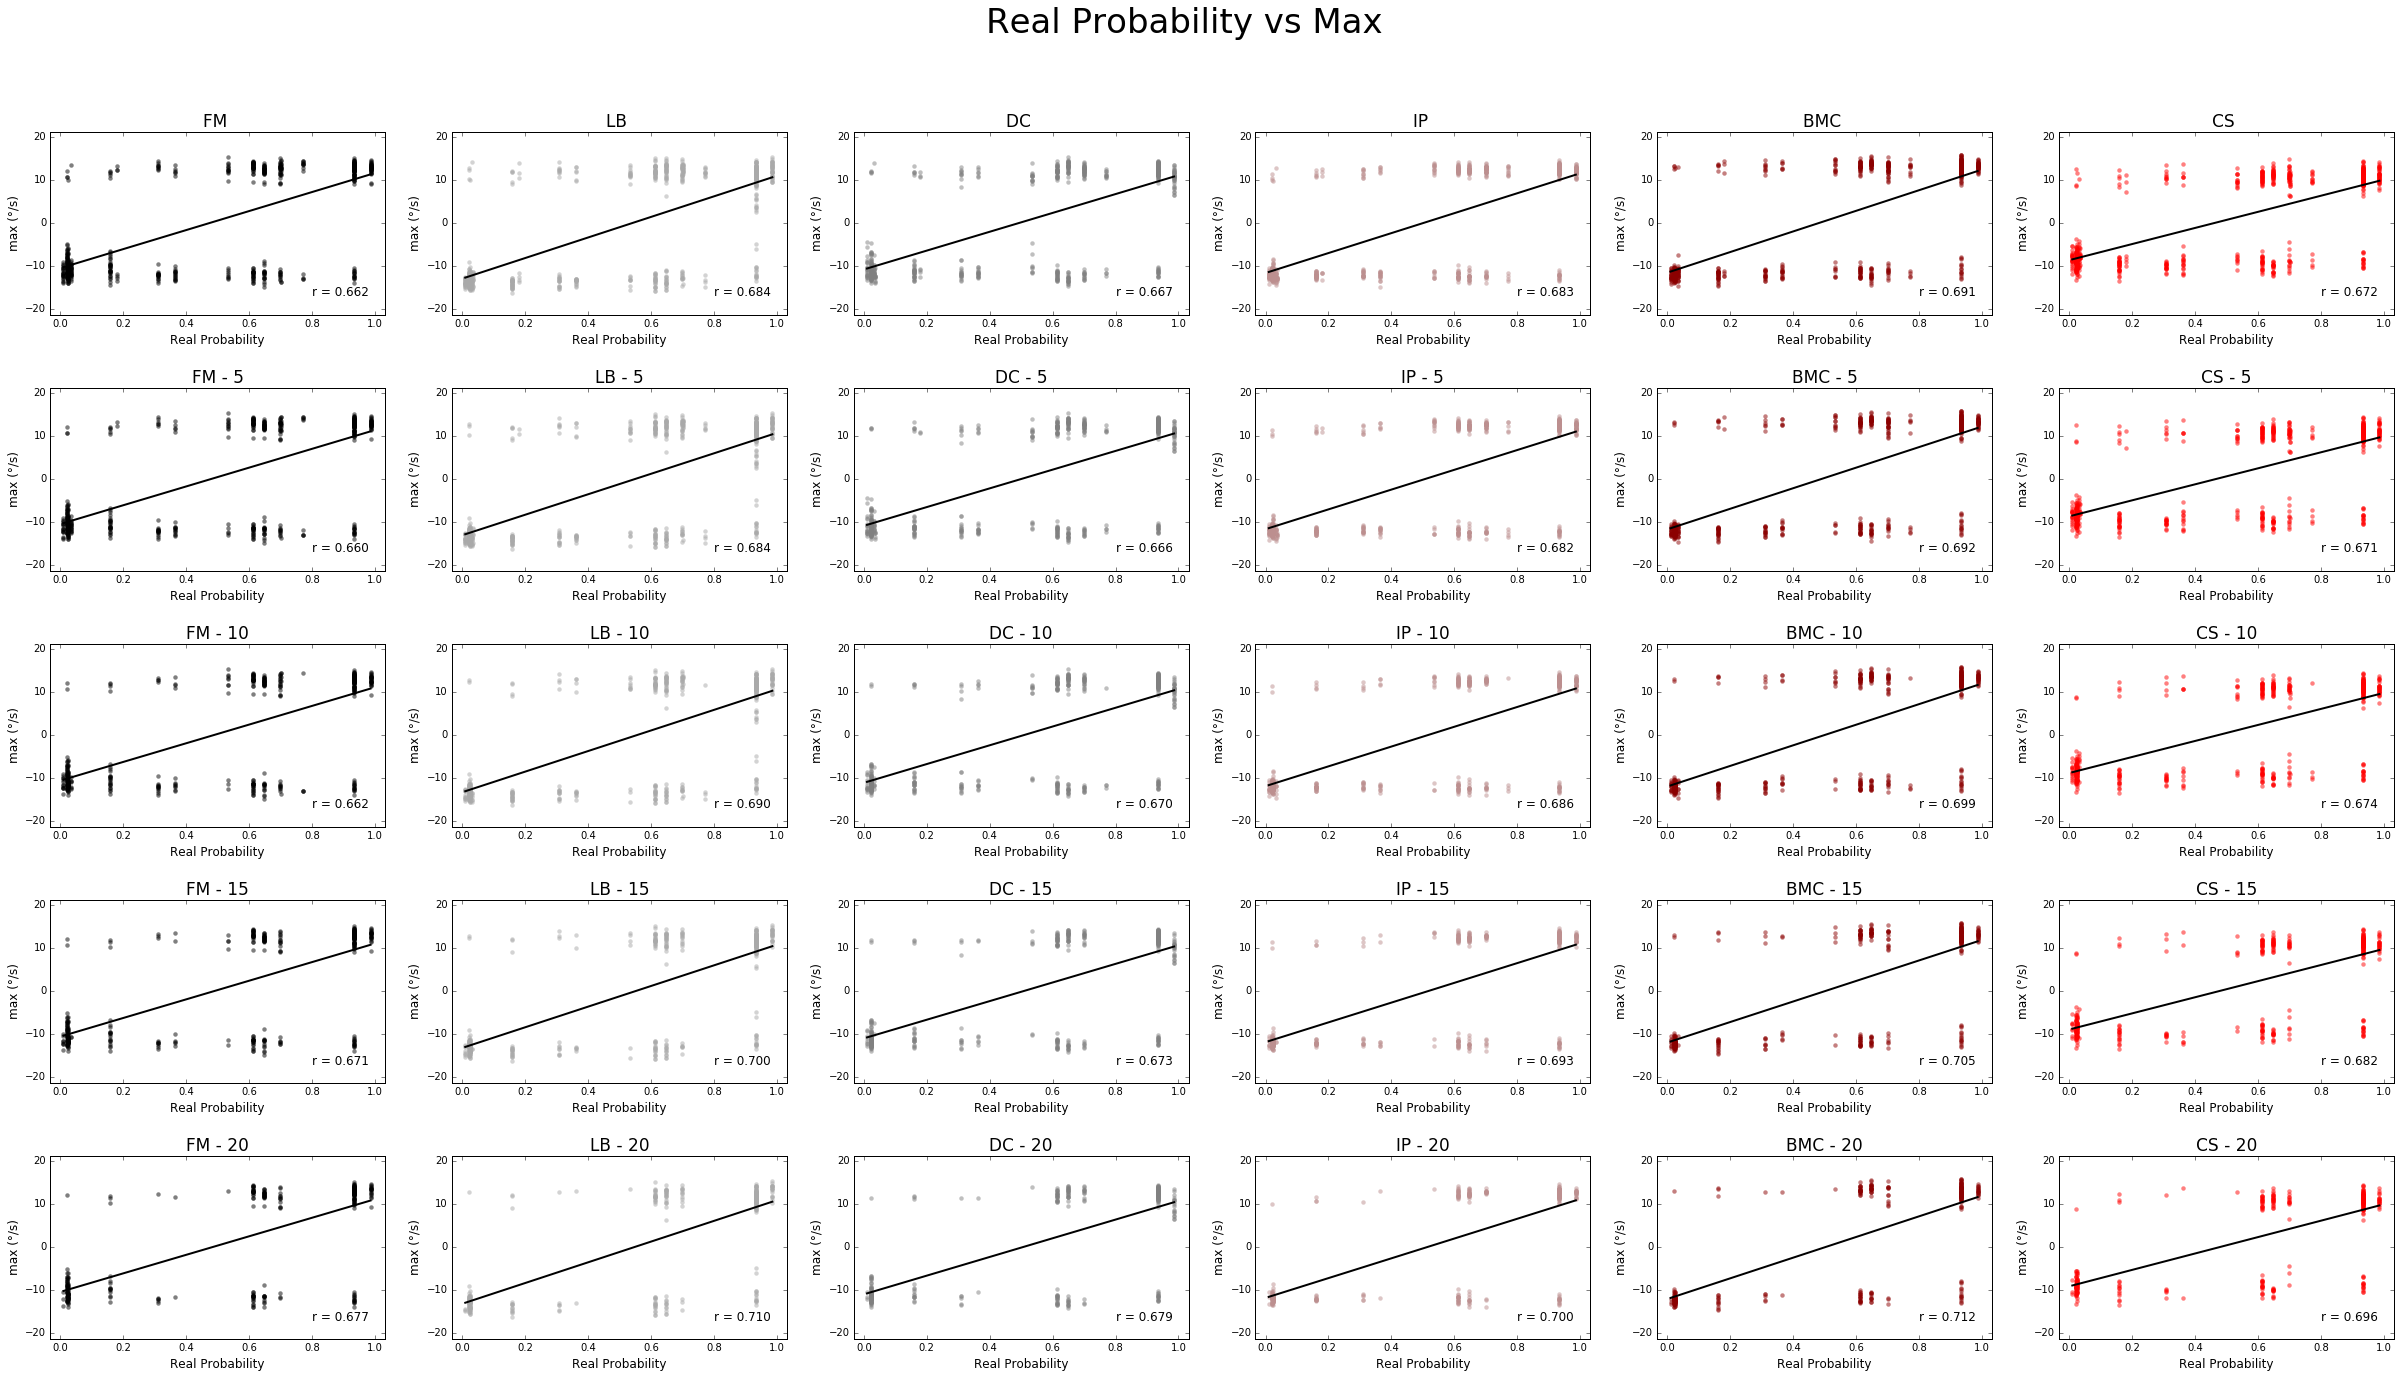

In [16]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability vs Max", fontsize=t_titre*2)
y_1 = -21.28
y_2 = 21.28

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        p = proba_sujet[a][x]    
        maxi = max_sujet[a][x]
        axs[a][x].scatter(p, maxi, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(p, maxi)
        x_test = np.linspace(np.min(p), np.max(p), 100)
        fitLine = slope * x_test + intercept

        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Real Probability', fontsize=t_label)
        axs[a][x].set_ylabel('max (°/s)', fontsize=t_label)

## Probabilité parié

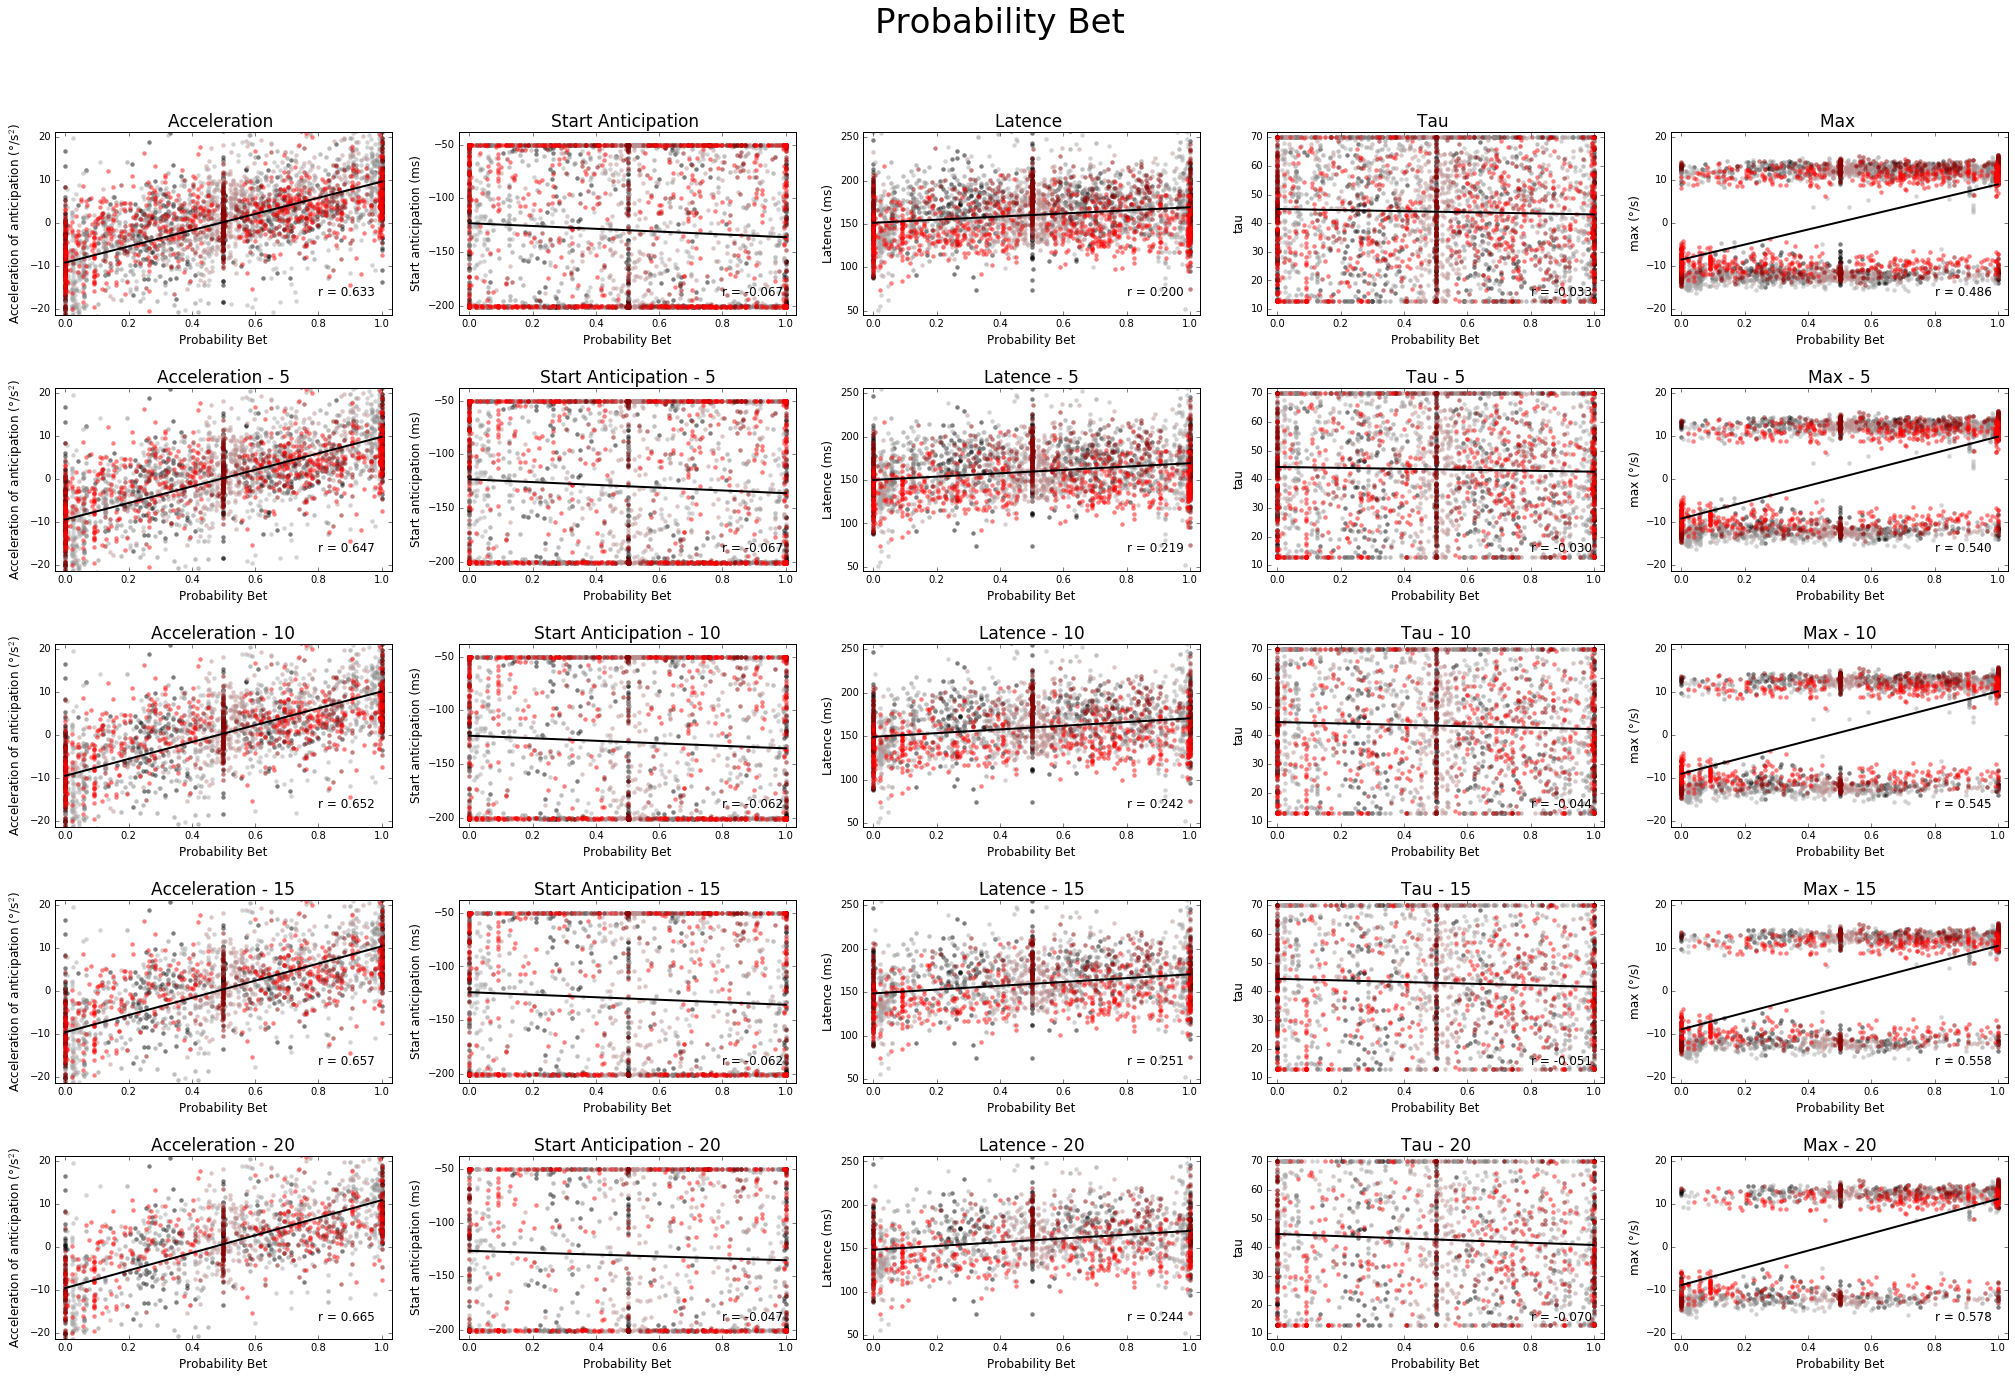

In [17]:
fig, axs = plt.subplots(len(proba_sujet), 5, figsize=(fig_width*5, (fig_width*len(proba_sujet))/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Probability Bet", fontsize=t_titre*2)

for z, comparaison in enumerate(['Acceleration', 'Start Anticipation', 'Latence', 'Tau', 'Max']) :

    for a, nom in enumerate(['','- 5', '- 10', '- 15', '- 20']) :
            
        if z == 0 :
            axs[a][z].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
            sujet = va_sujet[a]
            full = full_va[a]
            y_1 = -21.28
            y_2 = 21.28
        
        elif z == 1 :
            axs[a][z].set_ylabel('Start anticipation (ms)', fontsize=t_label)
            sujet = start_a_sujet[a]
            full = full_start_a[a]
            y_1 = -208.08
            y_2 = -38.08
            
        elif z == 2 :
            axs[a][z].set_ylabel('Latence (ms)', fontsize=t_label)
            sujet = latence_sujet[a]
            full = full_latence[a]
            y_1 = 45.6
            y_2 = 256.4
            
        elif z == 3 :
            axs[a][z].set_ylabel('tau', fontsize=t_label)
            sujet = tau_sujet[a]
            full = full_tau[a]
            y_1 = 8.08
            y_2 = 71.92
            
        elif z == 4 :
            axs[a][z].set_ylabel('max (°/s)', fontsize=t_label)
            sujet = max_sujet[a]
            full = full_max[a]
            y_1 = -21.28
            y_2 = 21.28
            
        for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
            axs[a][z].scatter(results_sujet[a][x], sujet[x], c=color, alpha=0.5, linewidths=0)
            
        slope, intercept, r_value, p_value, std_err = stats.linregress(full_results[a], full)
        x_test = np.linspace(np.min(full_results[a]), np.max(full_results[a]), 100)
        fitLine = slope * x_test + intercept

        axs[a][z].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][z].text(0.8,y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        axs[a][z].axis([-0.032, 1.032, y_1, y_2])
 
        axs[a][z].set_title("%s %s"%(comparaison, nom), fontsize=t_titre)
        axs[a][z].set_xlabel('Probability Bet', fontsize=t_label)

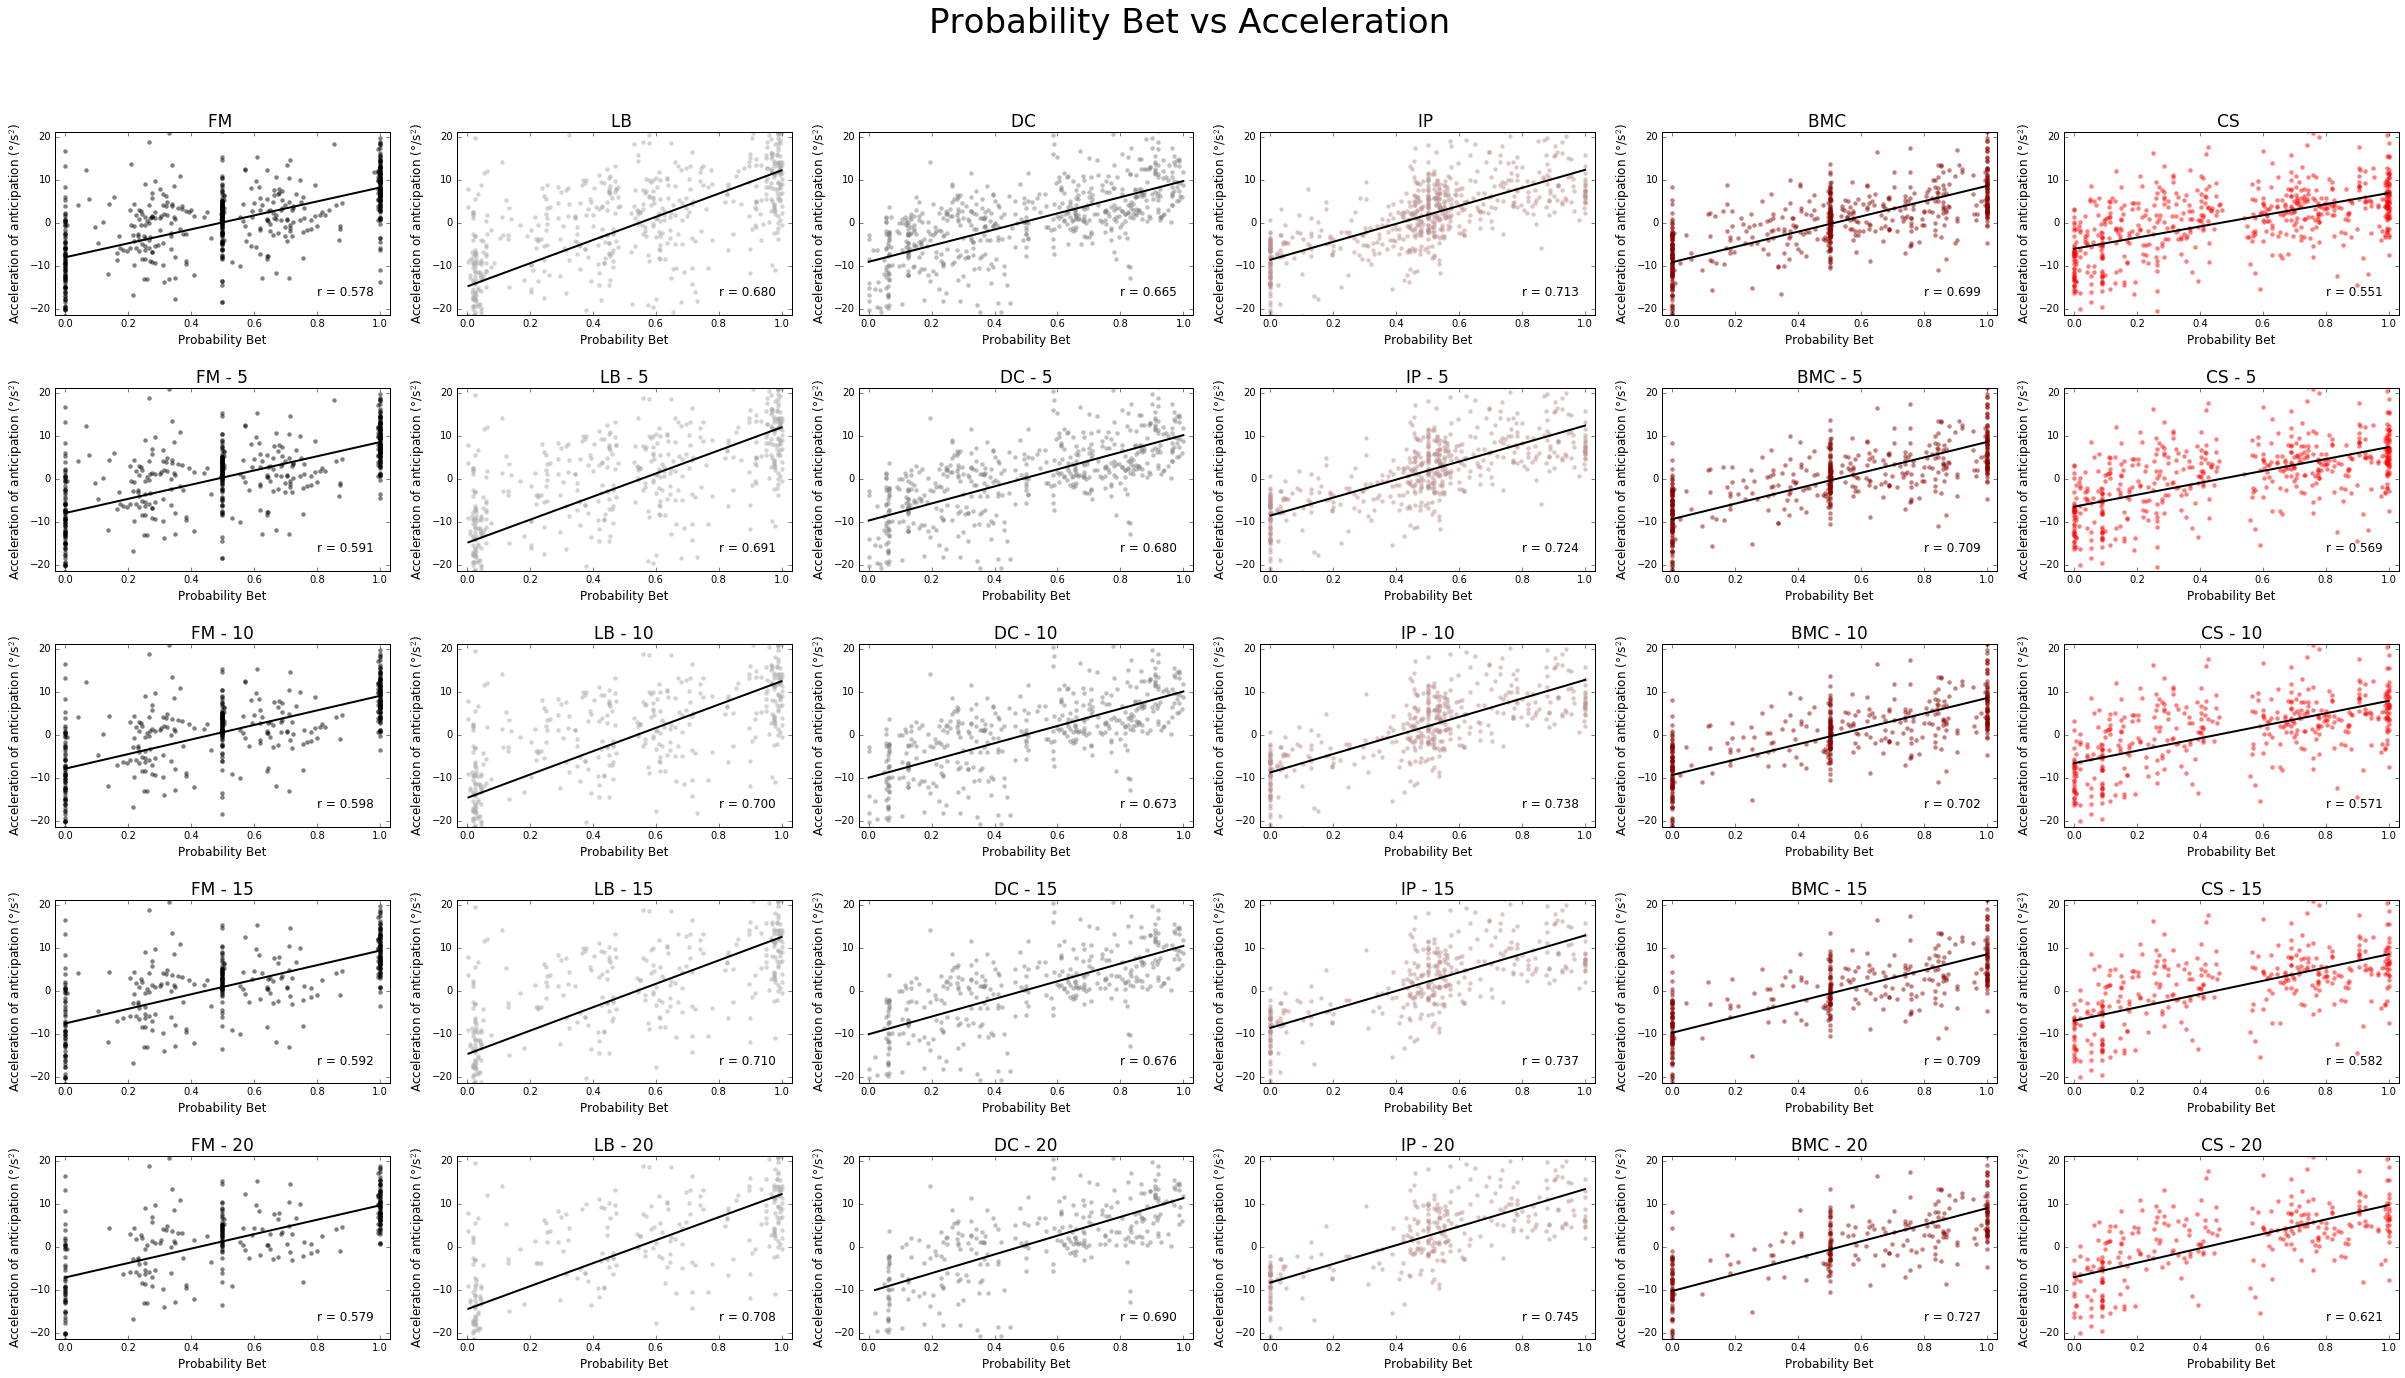

In [18]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Probability Bet vs Acceleration", fontsize=t_titre*2)
y_1 = -21.28
y_2 = 21.28

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        results = results_sujet[a][x]
        v_anti = va_sujet[a][x]
        
        axs[a][x].scatter(results, v_anti, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(results, v_anti)
        x_test = np.linspace(np.min(results), np.max(results), 100)
        fitLine = slope * x_test + intercept
        
        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Probability Bet', fontsize=t_label)
        axs[a][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

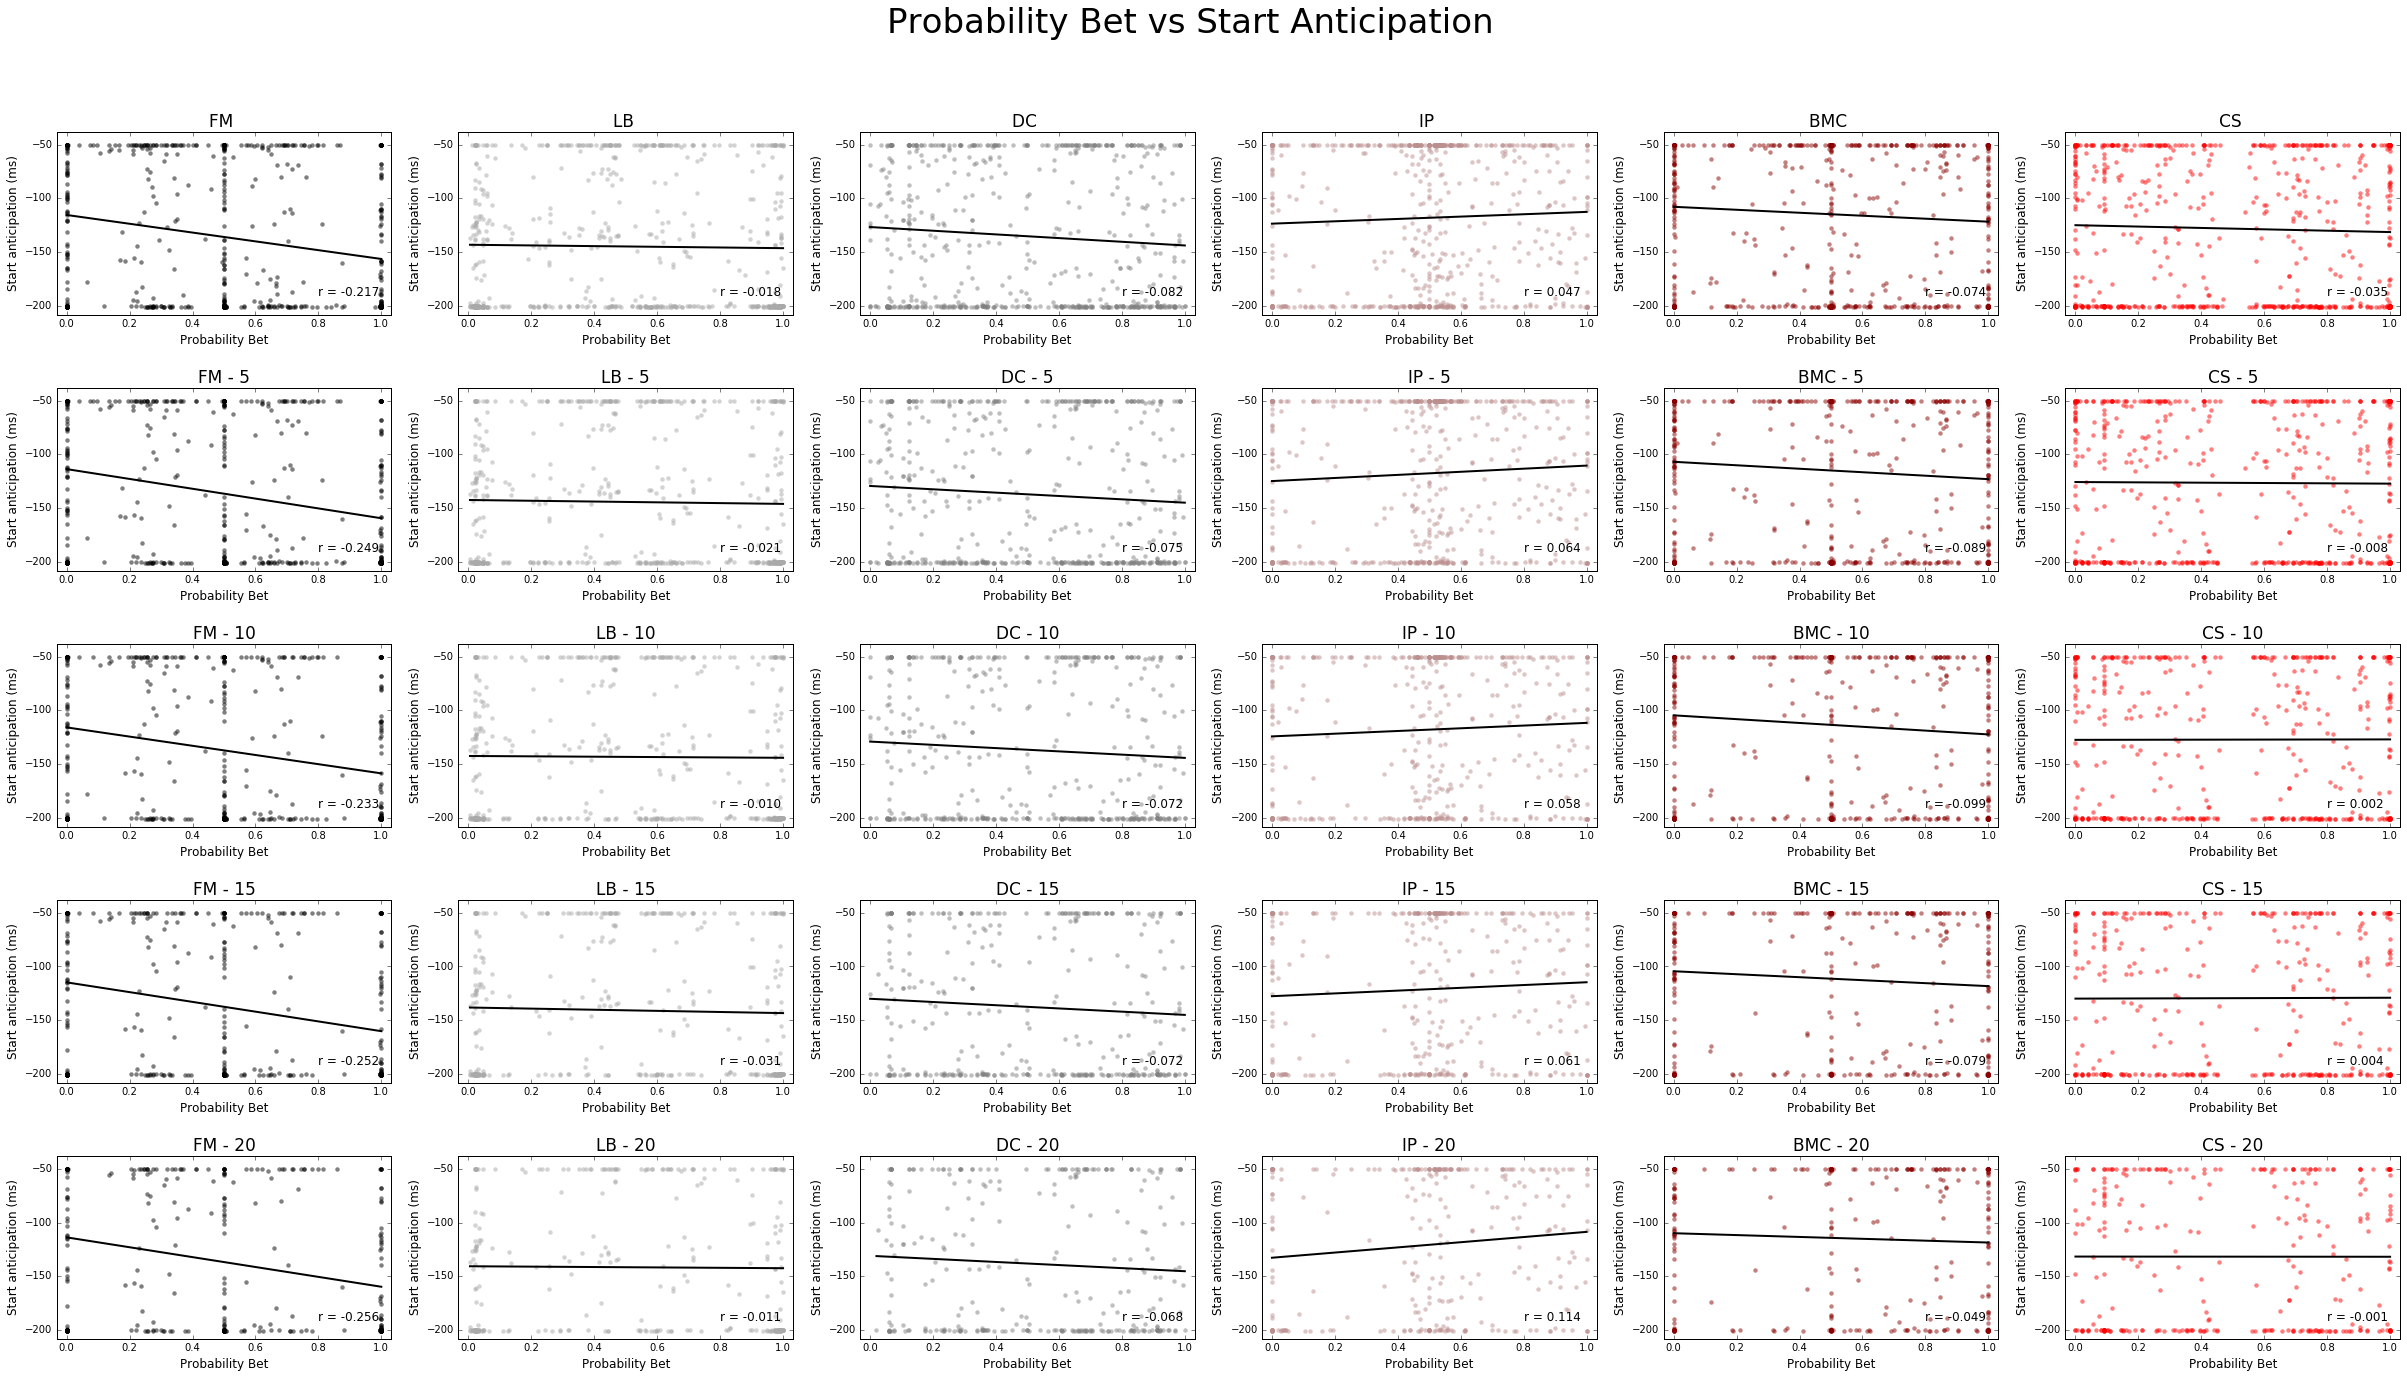

In [19]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Probability Bet vs Start Anticipation", fontsize=t_titre*2)
y_1 = -208.08
y_2 = -38.08

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        results = results_sujet[a][x]   
        start_a = start_a_sujet[a][x]
        axs[a][x].scatter(results, start_a, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(results, start_a)
        x_test = np.linspace(np.min(results), np.max(results), 100)
        fitLine = slope * x_test + intercept

        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Probability Bet', fontsize=t_label)
        axs[a][x].set_ylabel('Start anticipation (ms)', fontsize=t_label)

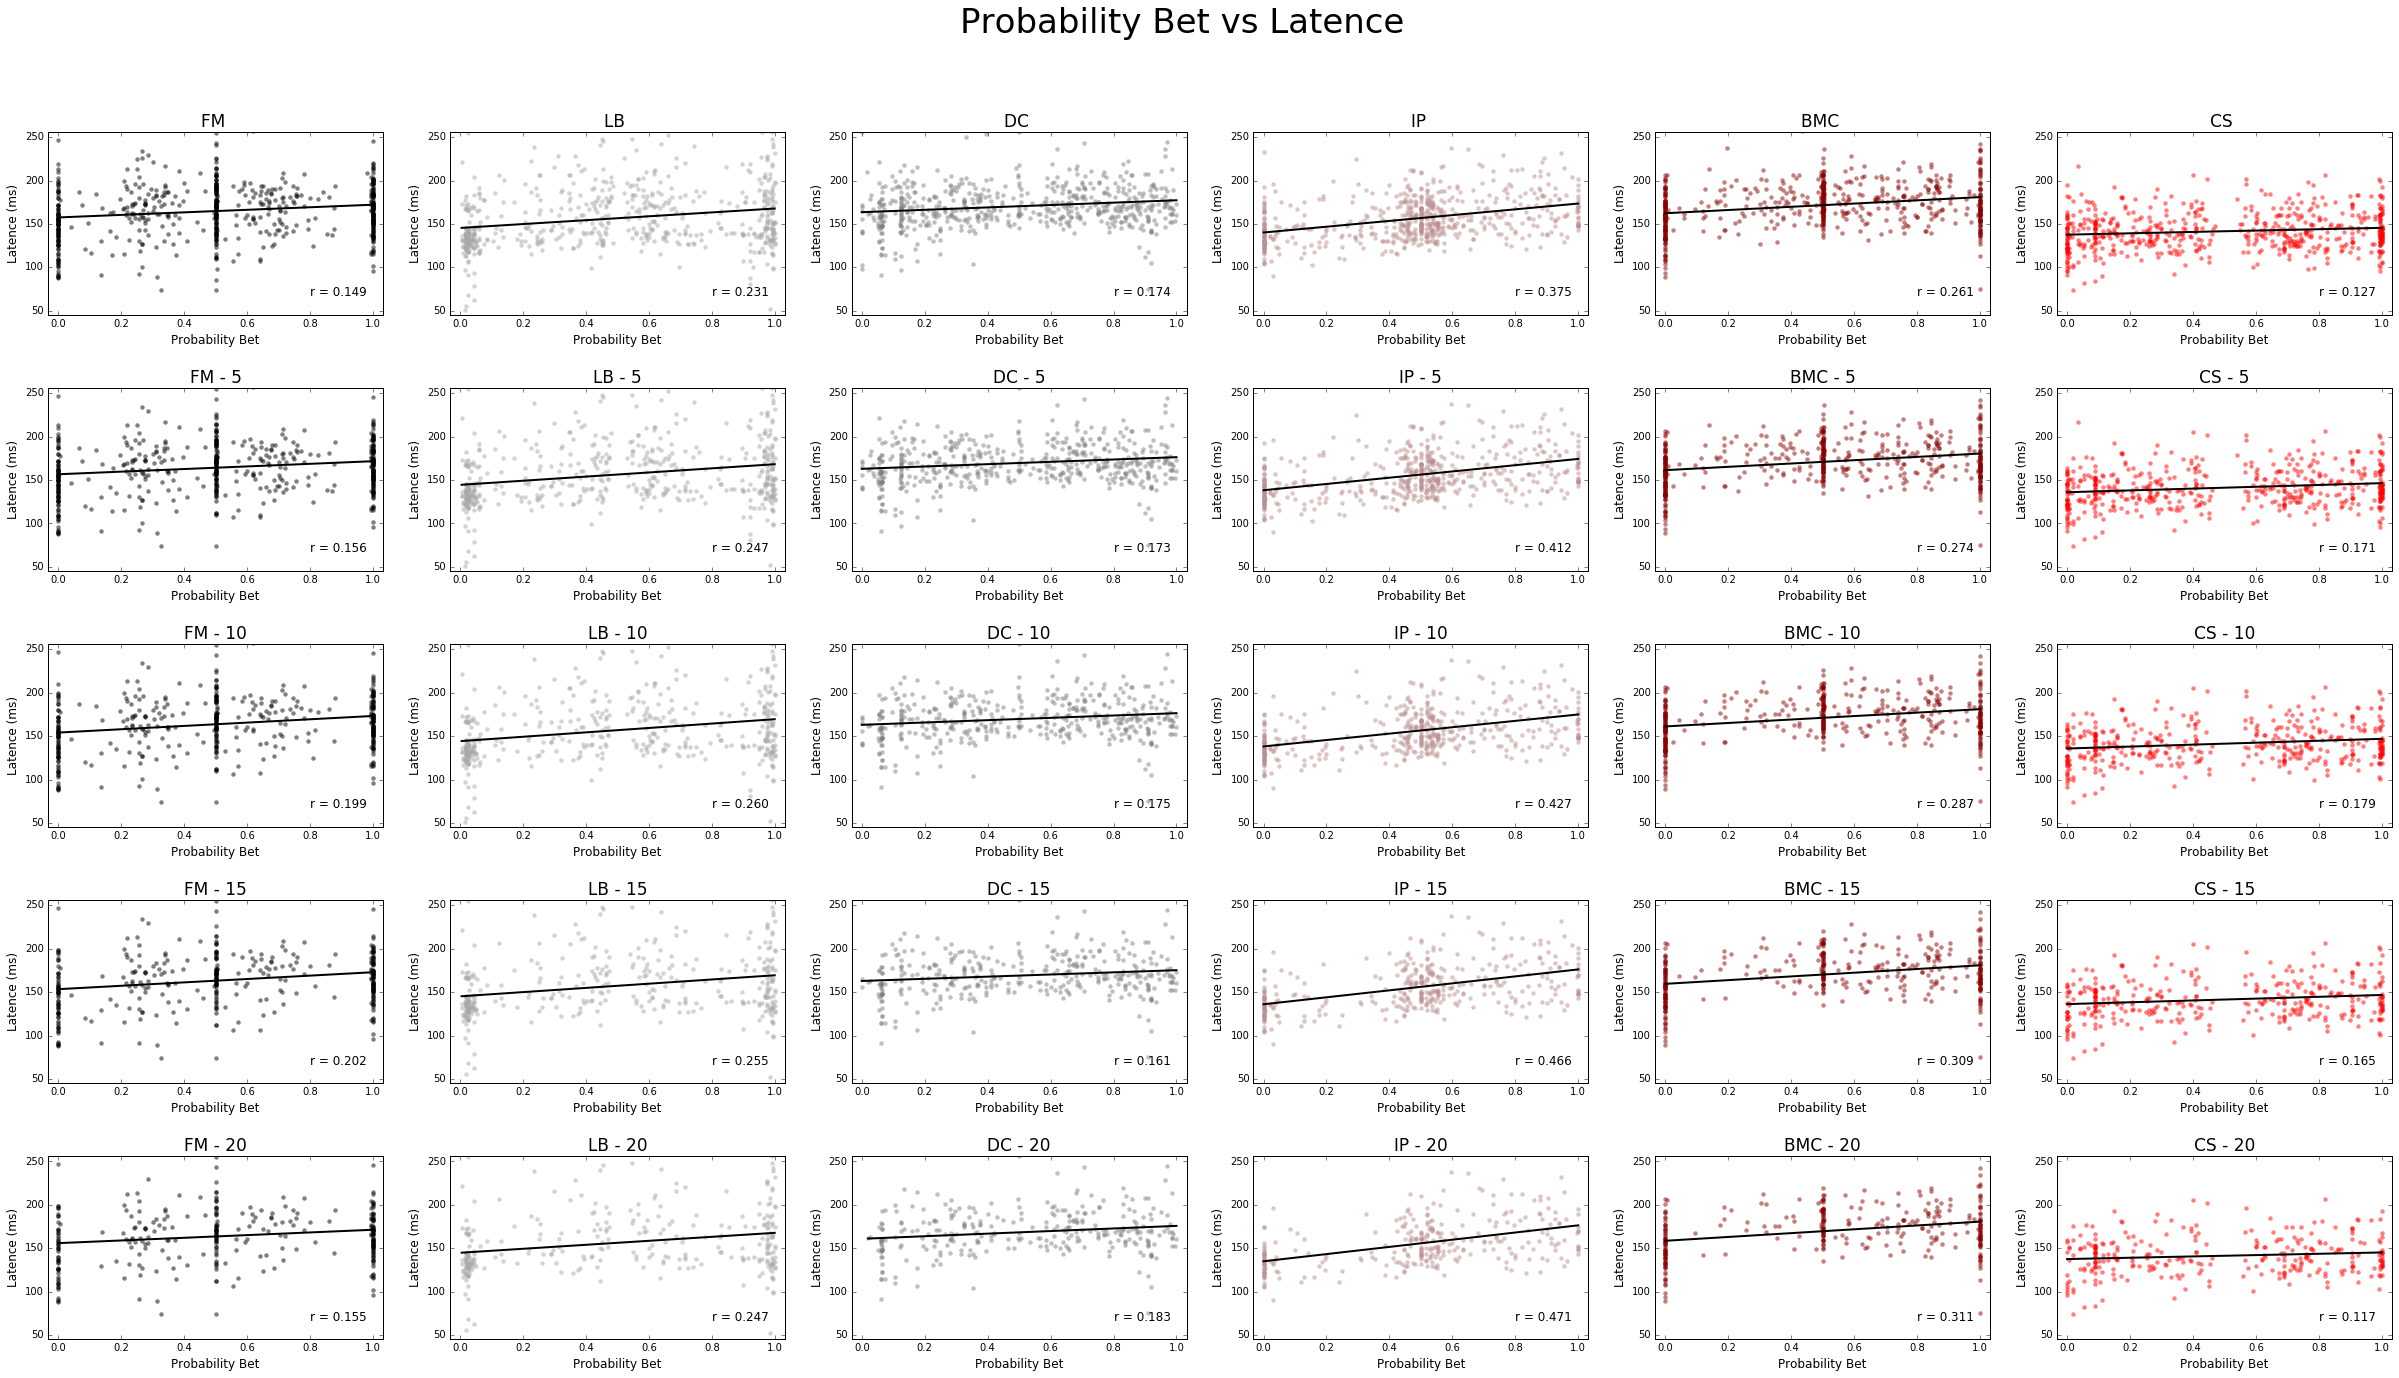

In [20]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Probability Bet vs Latence", fontsize=t_titre*2)
y_1 = 45.6
y_2 = 256.4


for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        results = results_sujet[a][x]    
        latence = latence_sujet[a][x]
        axs[a][x].scatter(results, latence, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(results, latence)
        x_test = np.linspace(np.min(results), np.max(results), 100)
        fitLine = slope * x_test + intercept

        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Probability Bet', fontsize=t_label)
        axs[a][x].set_ylabel('Latence (ms)', fontsize=t_label)

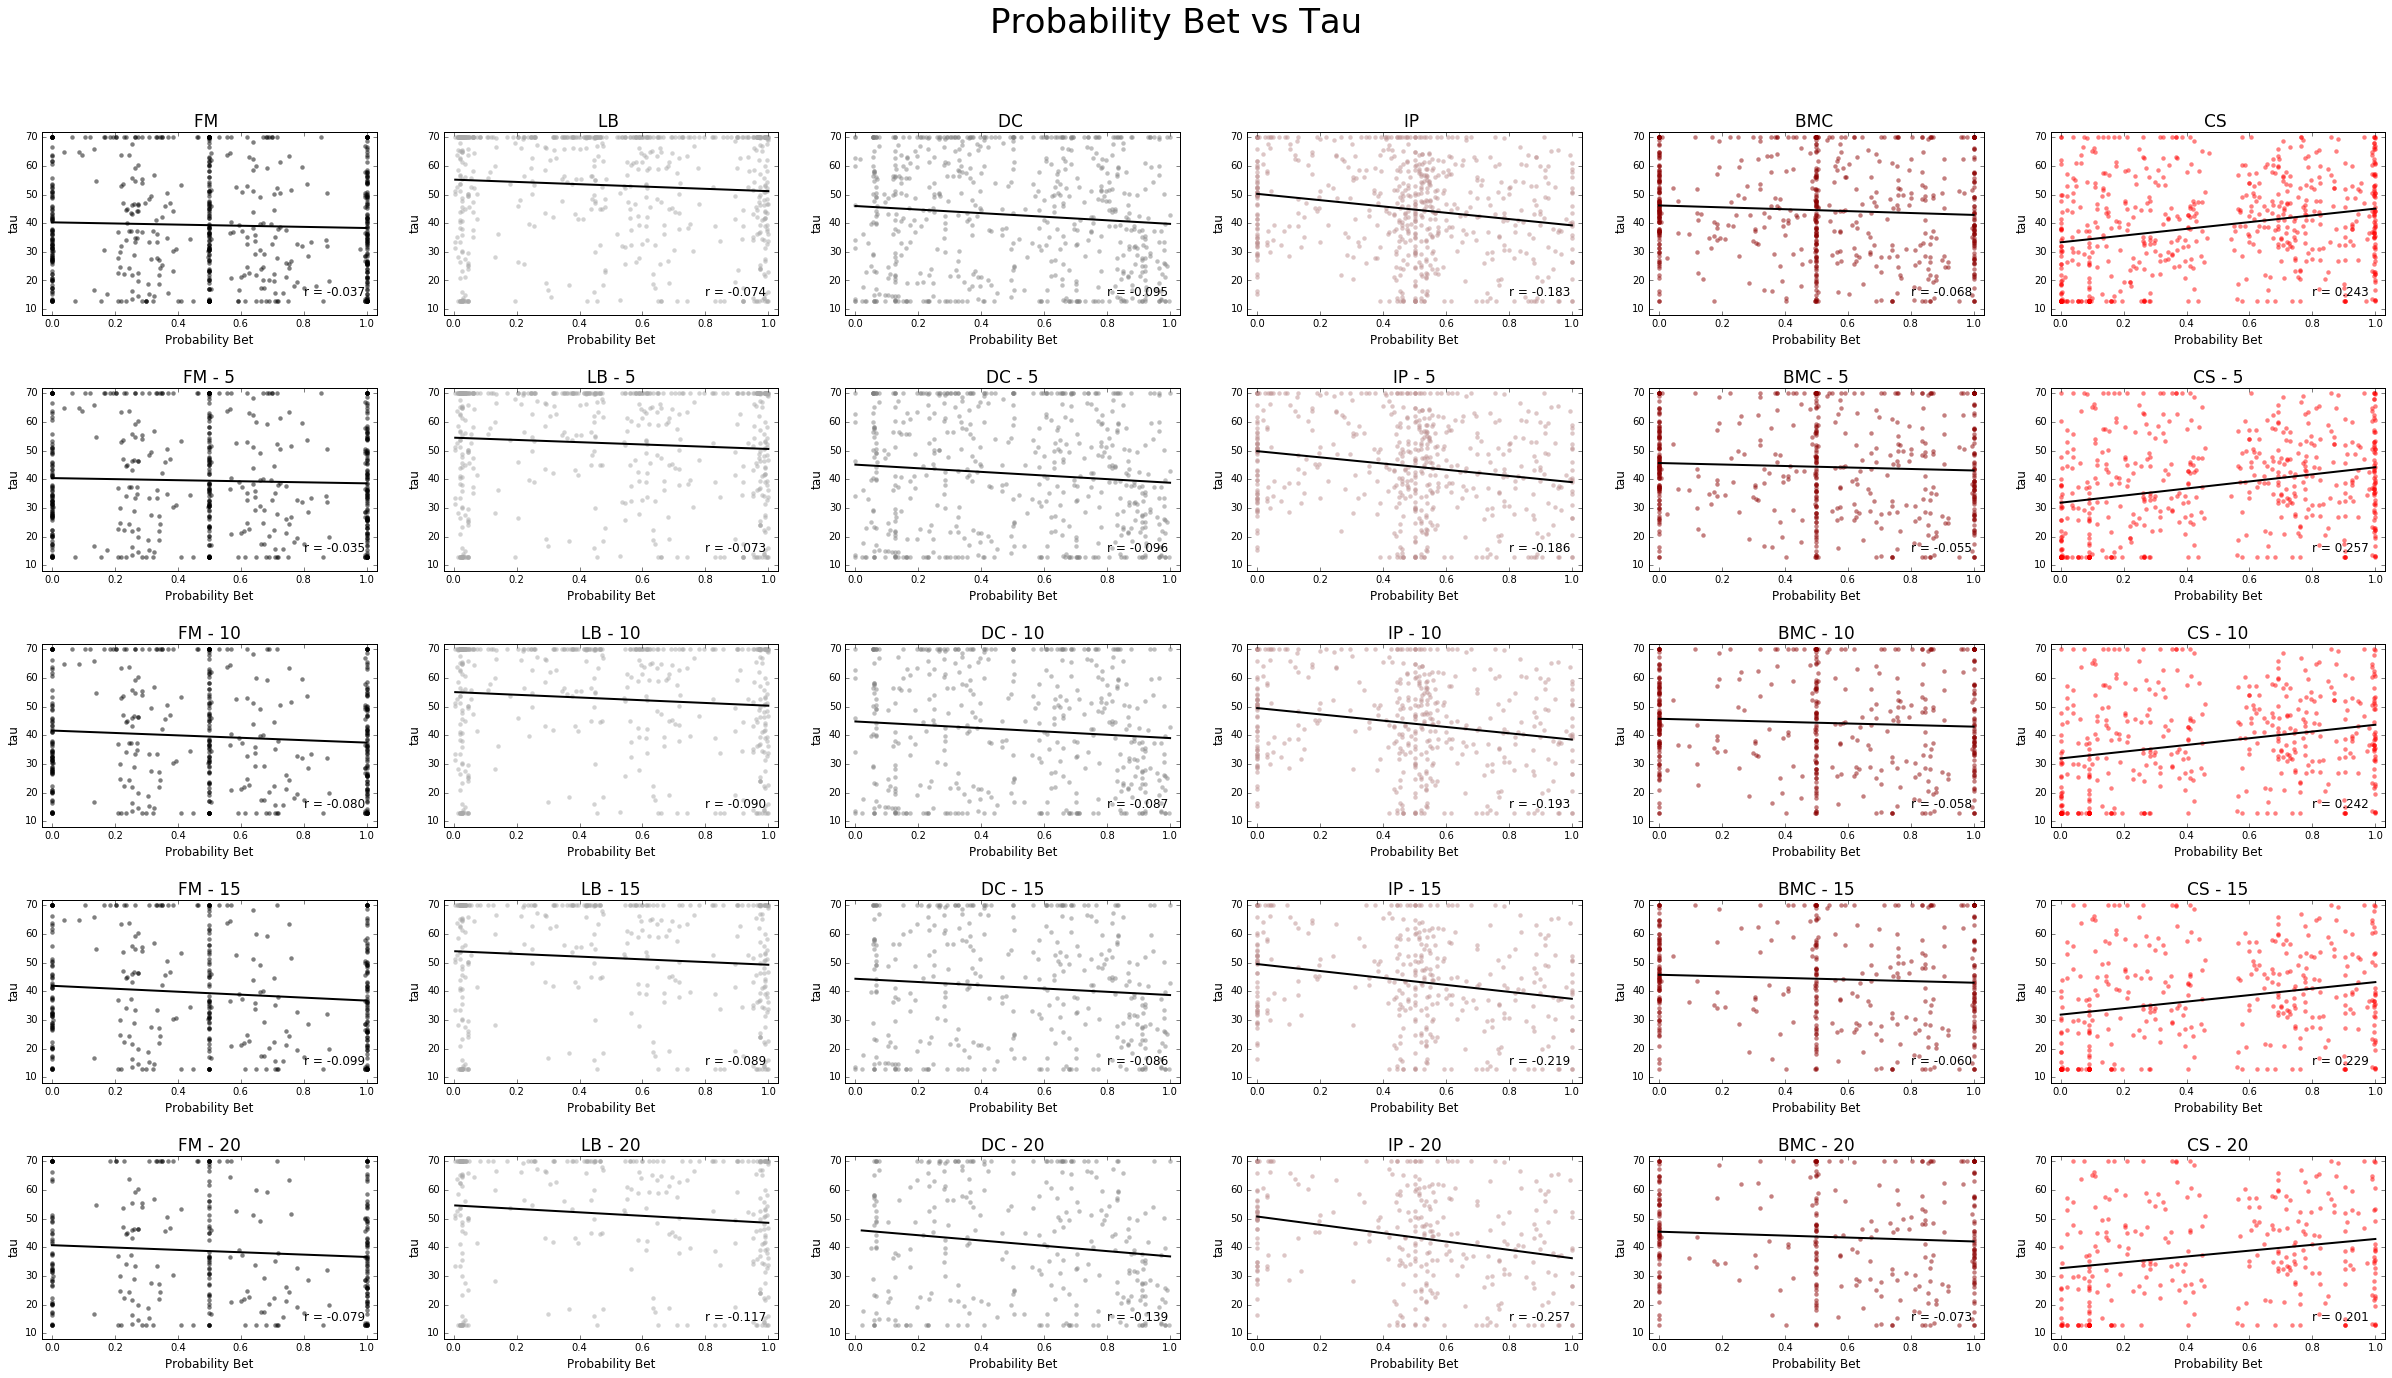

In [21]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Probability Bet vs Tau", fontsize=t_titre*2)
y_1 = 8.08
y_2 = 71.92
            
for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        results = results_sujet[a][x]    
        tau = tau_sujet[a][x]
        axs[a][x].scatter(results, tau, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(results, tau)
        x_test = np.linspace(np.min(results), np.max(results), 100)
        fitLine = slope * x_test + intercept

        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Probability Bet', fontsize=t_label)
        axs[a][x].set_ylabel('tau', fontsize=t_label)

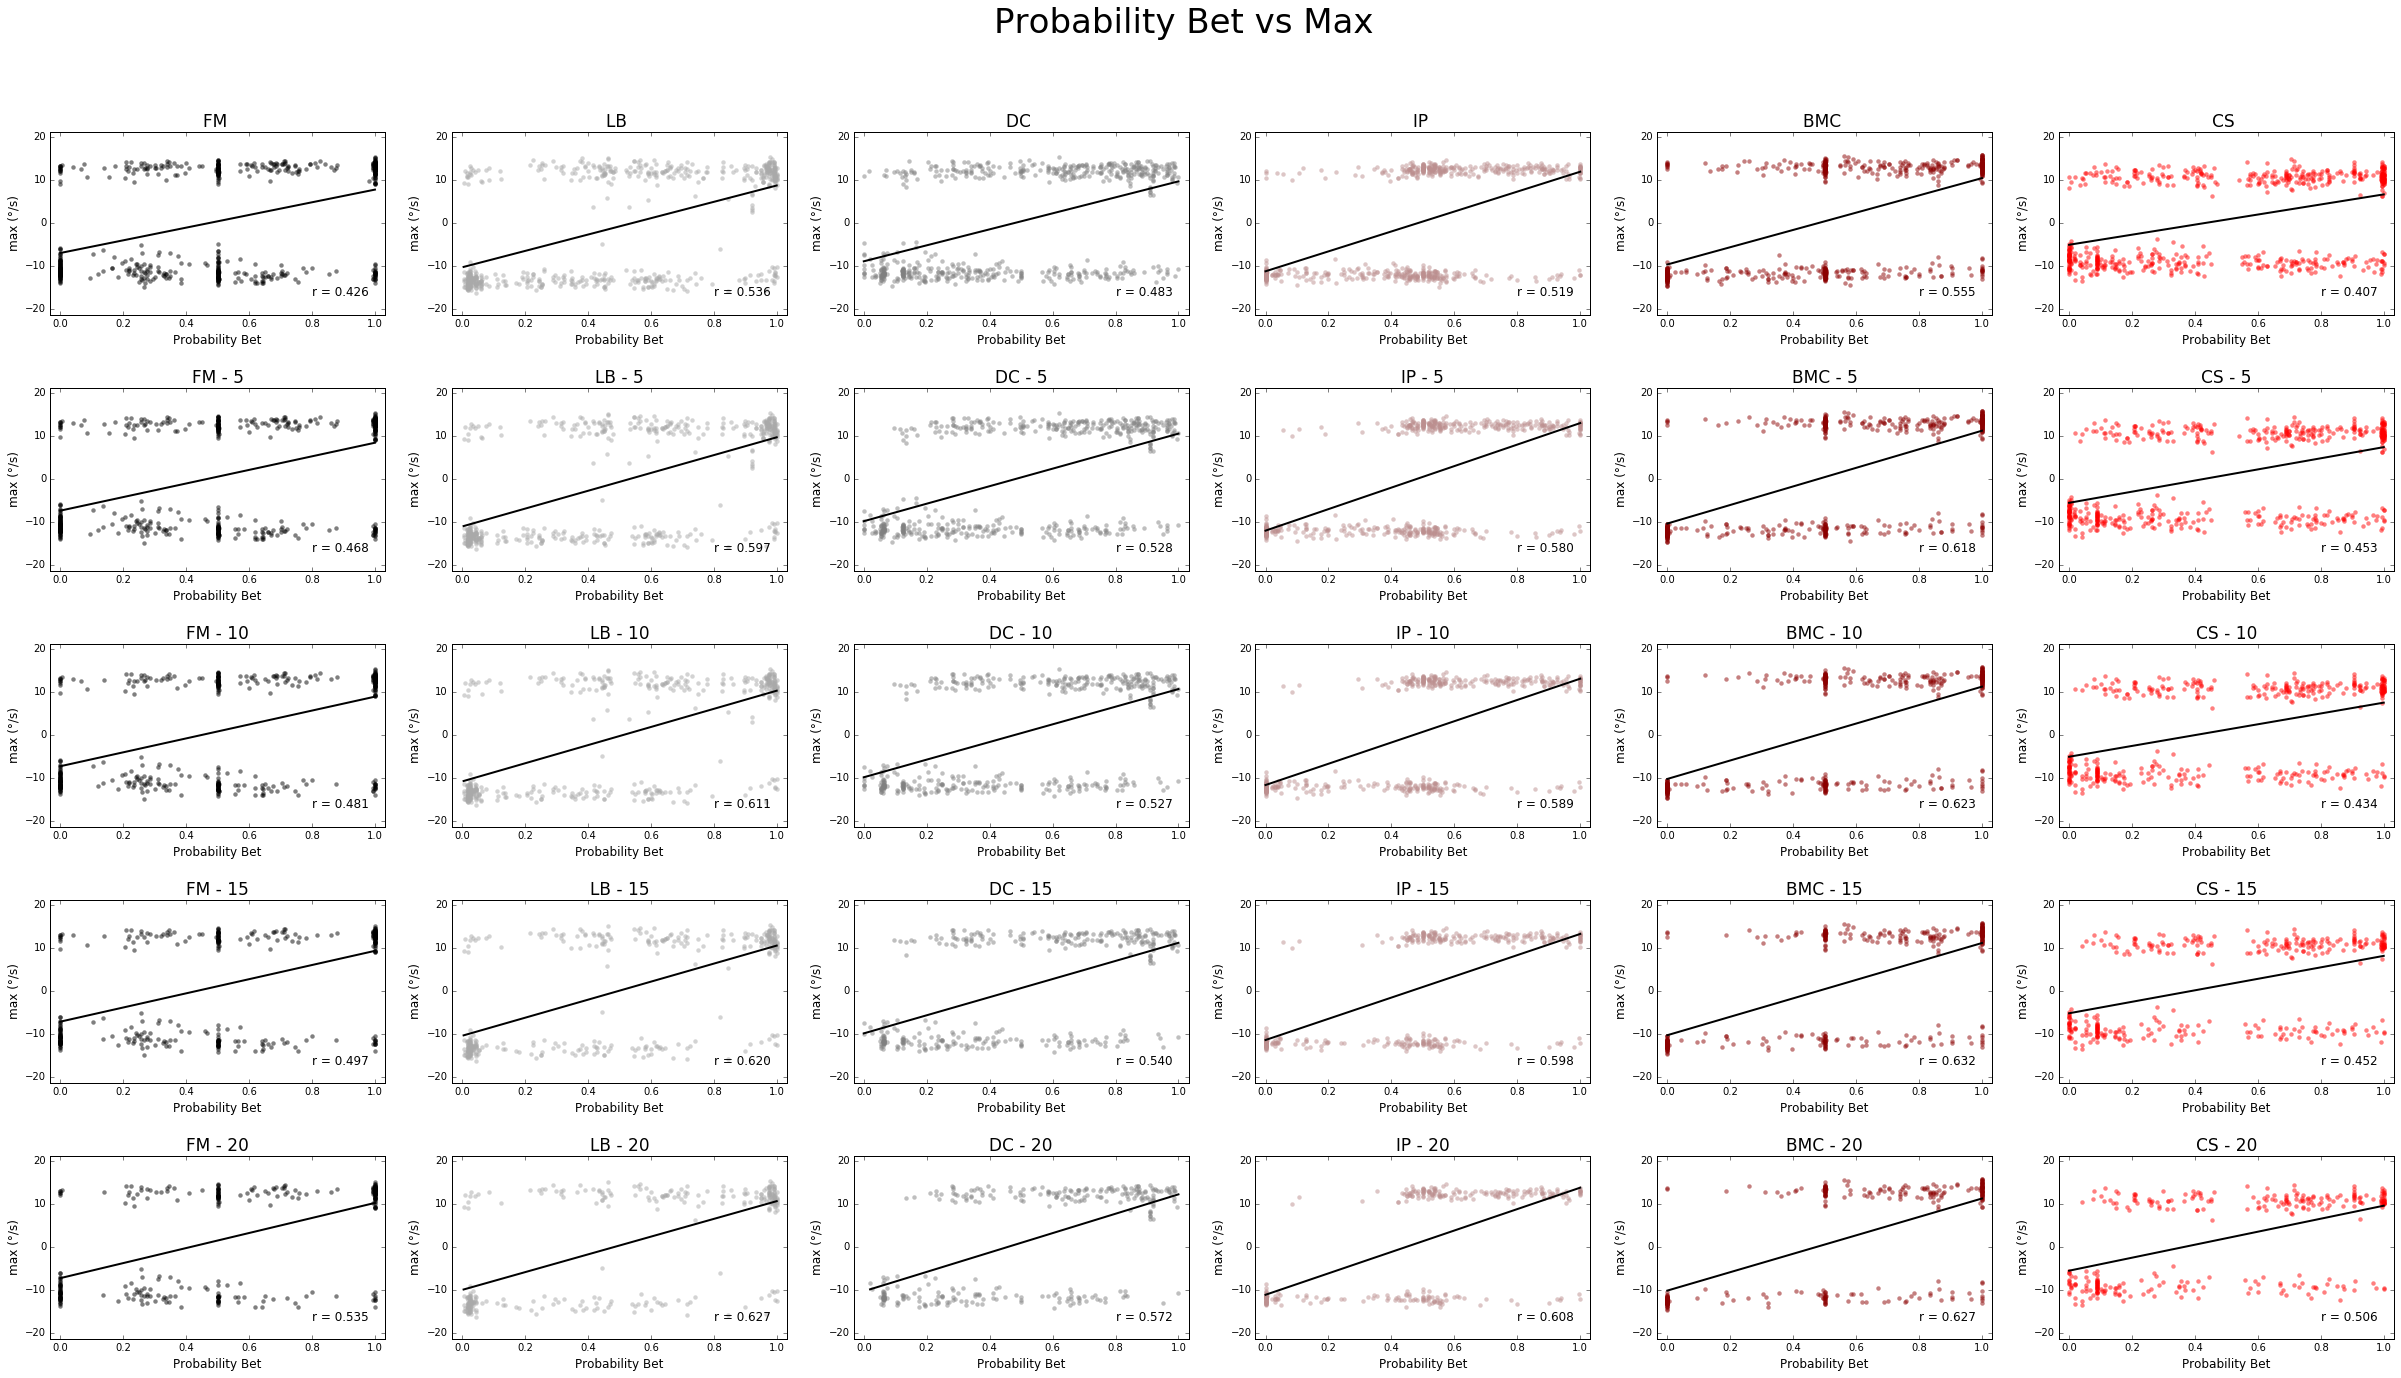

In [22]:
fig, axs = plt.subplots(len(proba_sujet), 6, figsize=(fig_width*6, (fig_width*len(proba_sujet))/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Probability Bet vs Max", fontsize=t_titre*2)
y_1 = -21.28
y_2 = 21.28

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    for a, nom in enumerate(['', '- 5', '- 10', '- 15', '- 20']) :

        results = results_sujet[a][x]     
        maxi = max_sujet[a][x]
        axs[a][x].scatter(results, maxi, c=color, alpha=0.5, linewidths=0)

        slope, intercept, r_value, p_value, std_err = stats.linregress(results, maxi)
        x_test = np.linspace(np.min(results), np.max(results), 100)
        fitLine = slope * x_test + intercept

        axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        
        axs[a][x].axis([-0.032, 1.032, y_1, y_2])
        axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
        axs[a][x].set_xlabel('Probability Bet', fontsize=t_label)
        axs[a][x].set_ylabel('max (°/s)', fontsize=t_label)